# TraCE plots

## Imports

In [1]:
import pandas as pd
from funcs import *
from funcs_ssp_study import *

In [19]:
# Definitions
SSPs = [str(ssp) for ssp in range(1, 5+1)]
start_date = "2015-02-01"
end_date = "2021-12-31"
frequency = "M"
data_folder = "/Users/michellewan/PycharmProjects/TraCE/data_pipeline/processed_monthly/exclude_precipitation"

In [3]:
country_codes_filepath = "/Users/michellewan/PycharmProjects/TraCE/data_pipeline/OECD_population_GDP/OECD_country_codes.csv"
country_codes_df = pd.read_csv(country_codes_filepath, header=None)
country_codes_df.columns = ["code", "name"]

## Scratch

In [36]:
df = pd.read_csv("/Users/michellewan/PycharmProjects/TraCE/data_pipeline/processed_monthly/historical_ch4.csv")
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])
df.set_index(df.columns[0], inplace=True)
df.index.name = None
date_index = pd.date_range(start=start_date, end=end_date, freq=frequency)

In [37]:
df.loc[date_index]

IDN       MYS       CHL       BOL       PER       ARG  \
2015-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
2015-02-28  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2015-03-31  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2015-04-30  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2015-05-31  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
...              ...       ...       ...       ...       ...       ...   
2021-08-31  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2021-09-30  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2021-10-31  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2021-11-30  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2021-12-31  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   

                 GBR       CYP       IND       CH1  ...       MDV       NRU  \
2015-01-31       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2015-02-28  0.000002  0.000002  0.000002  0.000002  ...  0.000002  0.000002   
2015-03-31  0.000002  0.000002  0.000002  0.000002  ...  0.000002  0.000002   
2015-04-30  0.000002  0.000002  0.000002  0.000002  ...  0.000002  0.000002   
2015-05-31  0.000002  0.000002  0.000002  0.000002  ...  0.000002  0.000002   
...              ...       ...       ...       ...  ...       ...       ...   
2021-08-31  0.000002  0.000002  0.000002  0.000002  ...  0.000002  0.000002   
2021-09-30  0.000002  0.000002  0.000002  0.000002  ...  0.000002  0.000002   
2021-10-31  0.000002  0.000002  0.000002  0.000002  ...  0.000002  0.000002   
2021-11-30  0.000002  0.000002  0.000002  0.000002  ...  0.000002  0.000002   
2021-12-31  0.000002  0.000002  0.000002  0.000002  ...  0.000002  0.000002   

                 FSM       VUT       PLW       BHR       PGA       BJN  \
2015-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
2015-02-28  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2015-03-31  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2015-04-30  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2015-05-31  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
...              ...       ...       ...       ...       ...       ...   
2021-08-31  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2021-09-30  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2021-10-31  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2021-11-30  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   
2021-12-31  0.000002  0.000002  0.000002  0.000002  0.000002  0.000002   

                 SER       SCR  
2015-01-31       NaN       NaN  
2015-02-28  0.000002  0.000002  
2015-03-31  0.000002  0.000002  
2015-04-30  0.000002  0.000002  
2015-05-31  0.000002  0.000002  
...              ...       ...  
2021-08-31  0.000002  0.000002  
2021-09-30  0.000002  0.000002  
2021-10-31  0.000002  0.000002  
2021-11-30  0.000002  0.000002  
2021-12-31  0.000002  0.000002  

[84 rows x 209 columns]

In [67]:
import xarray as xr

ds = xr.open_dataset("/Users/michellewan/Downloads/200301_202112-C3S-L3_GHG-GHG_PRODUCTS-MERGED-MERGED-OBS4MIPS-MERGED-v4.4.nc")

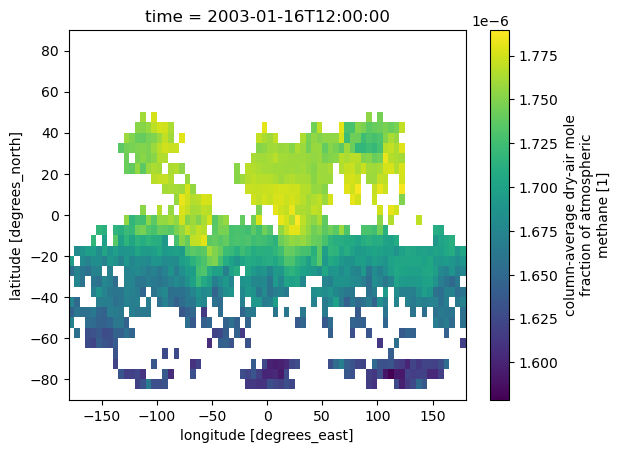

In [90]:
ds['time'] = pd.to_datetime(ds['time'])

# Select the data for January 2015
ds.sel(time='2003-01')["xch4"].plot()

In [94]:
np.isnan(ds["xch4"].values)

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

## TraCE score timeseries

Italy monthly cumulative TraCE score with variables: ch4, gdp, population, precipitation, pressure, temperature, wind_speed


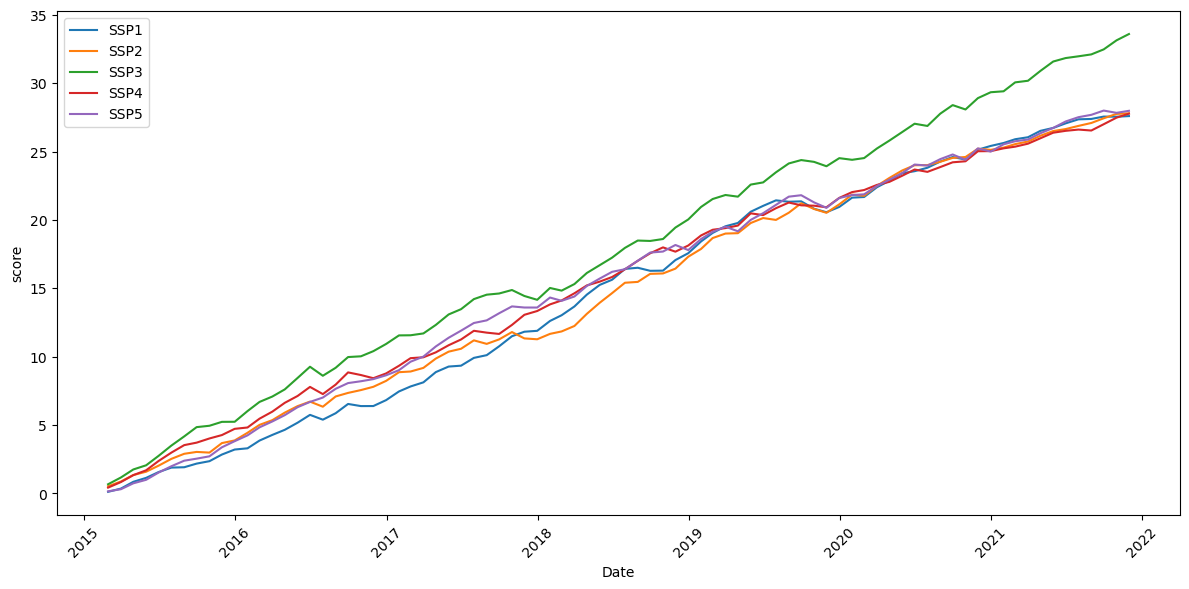

In [4]:
country_code = "ITA"

plot_country_ssp_trace_scores(country_code, SSPs, start_date, end_date, frequency, data_folder, country_codes_df, 
                                  angle_weight=0.9, cumulative_sum=True, figsize=(12,6), title=False)

Argentina monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


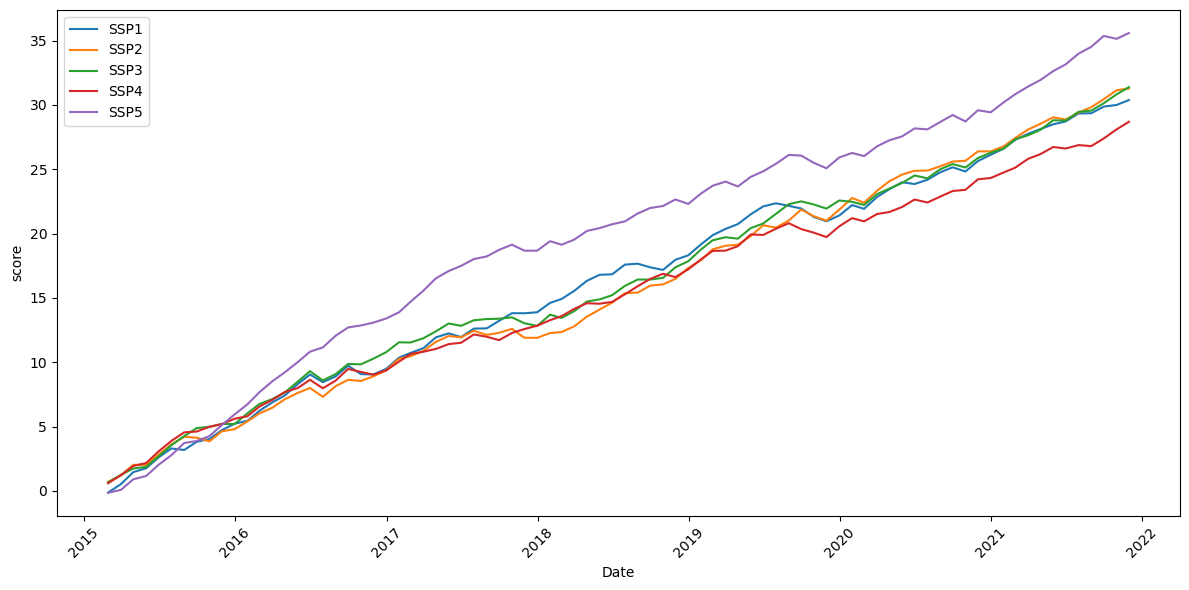

Australia monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


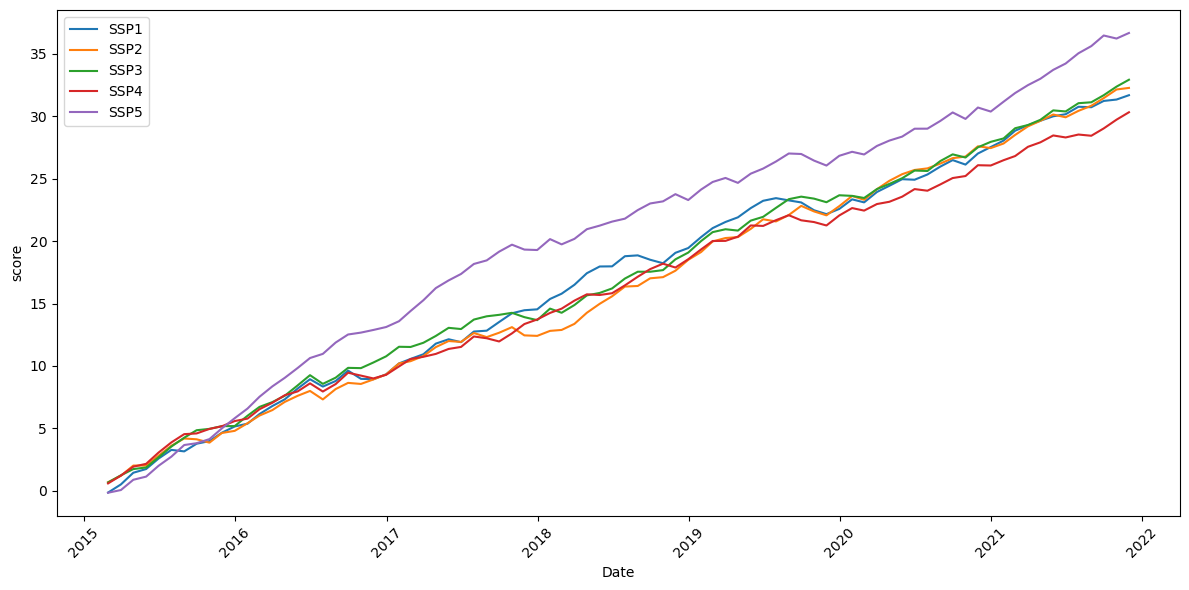

Austria monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


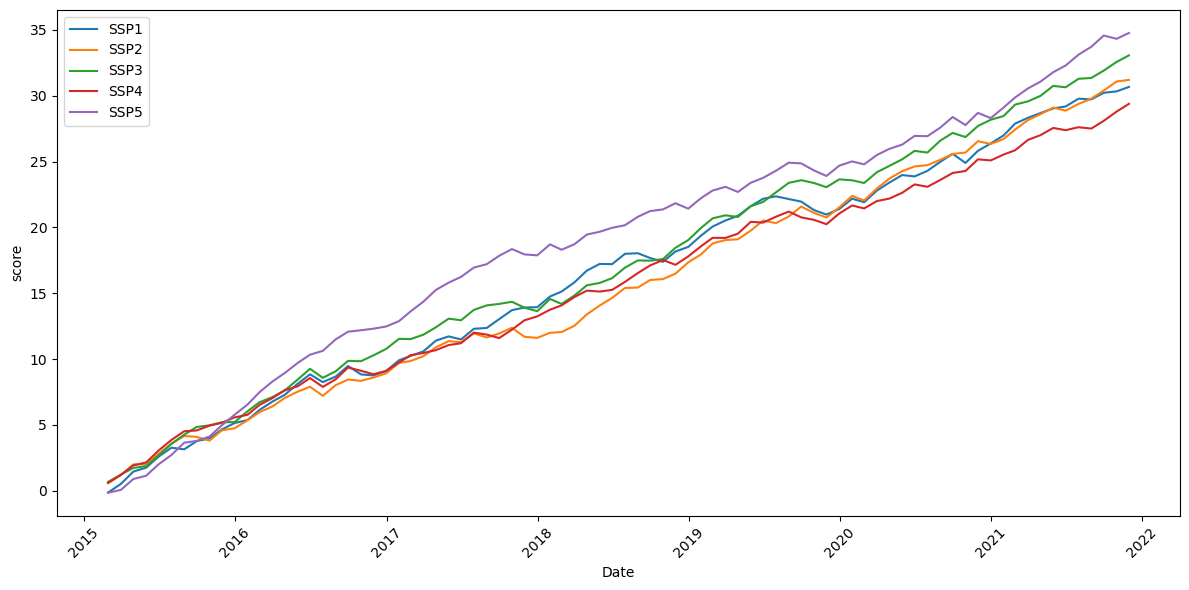

Belgium monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


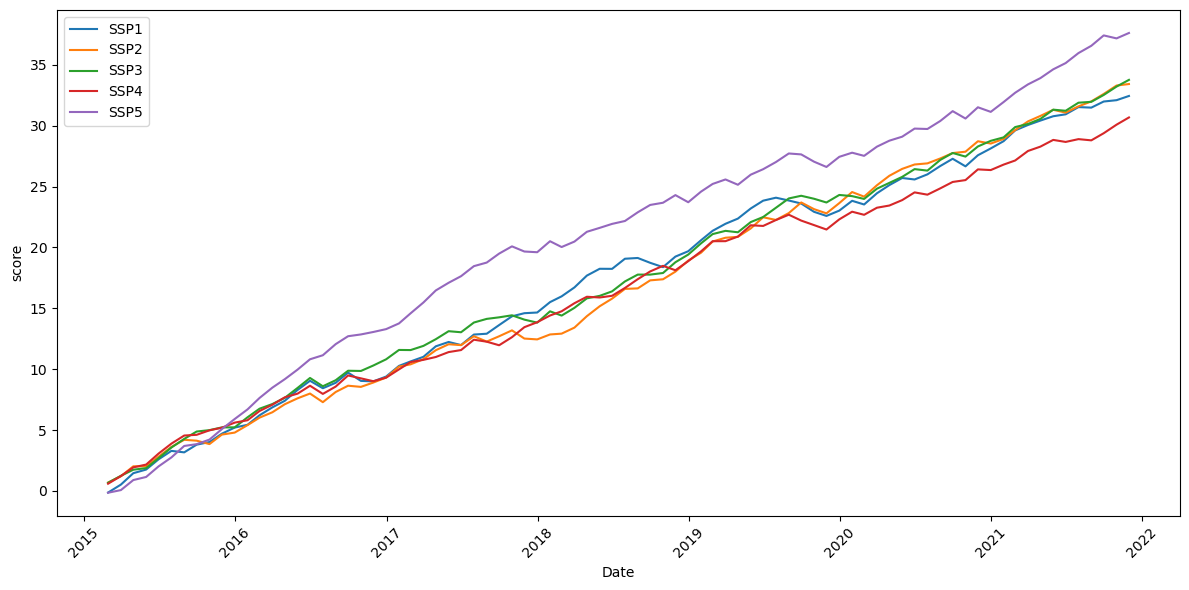

Bulgaria monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


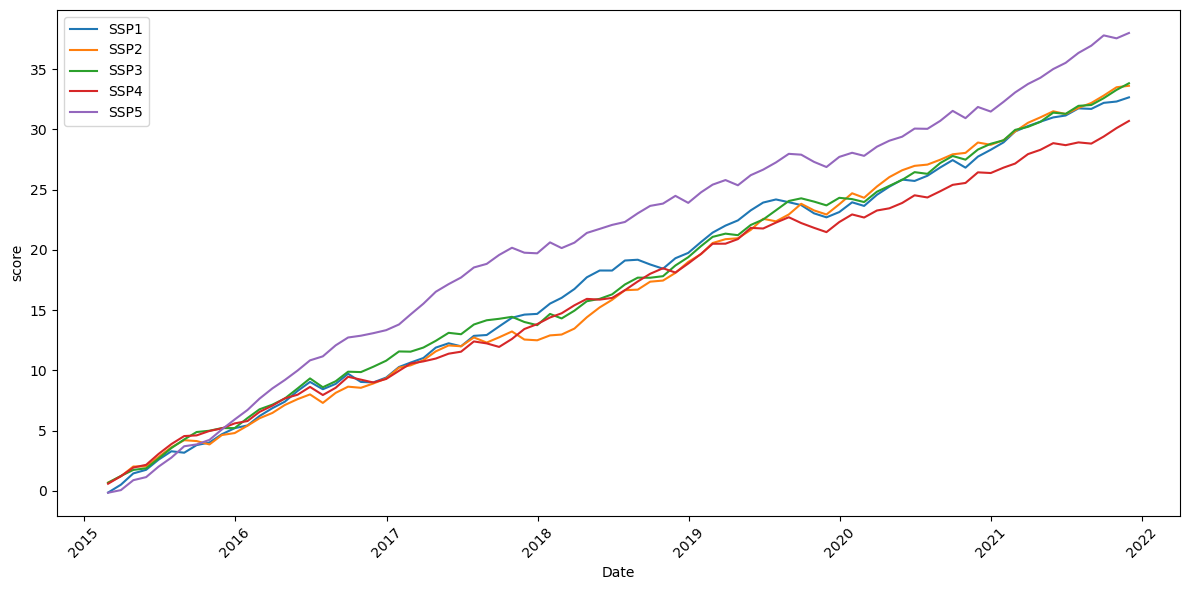

Brazil monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


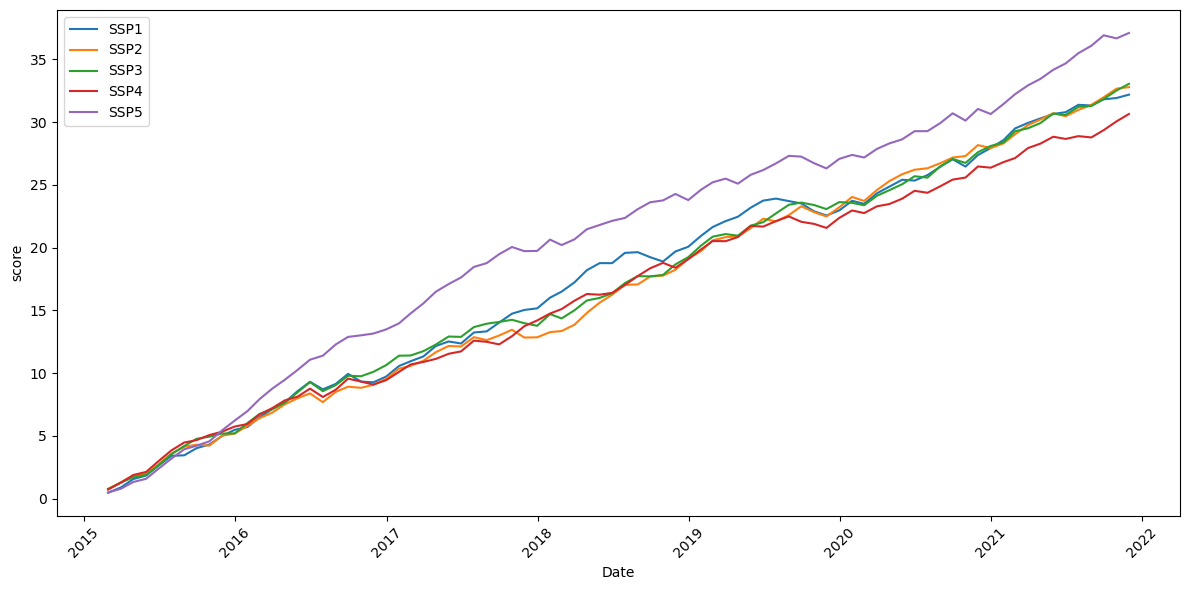

Canada monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


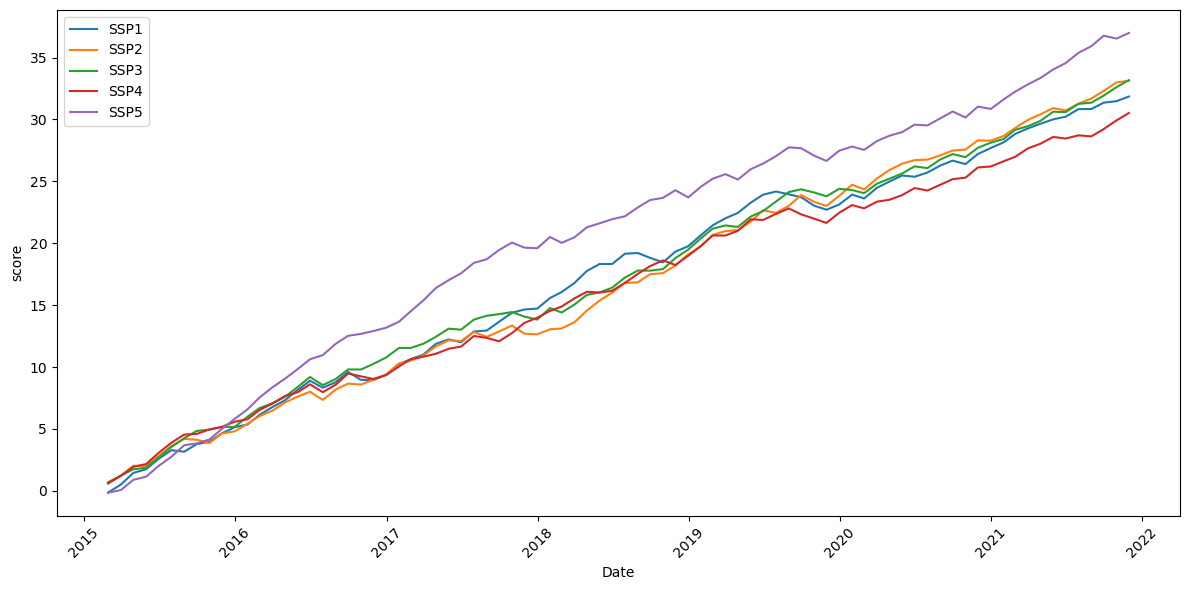

Switzerland monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


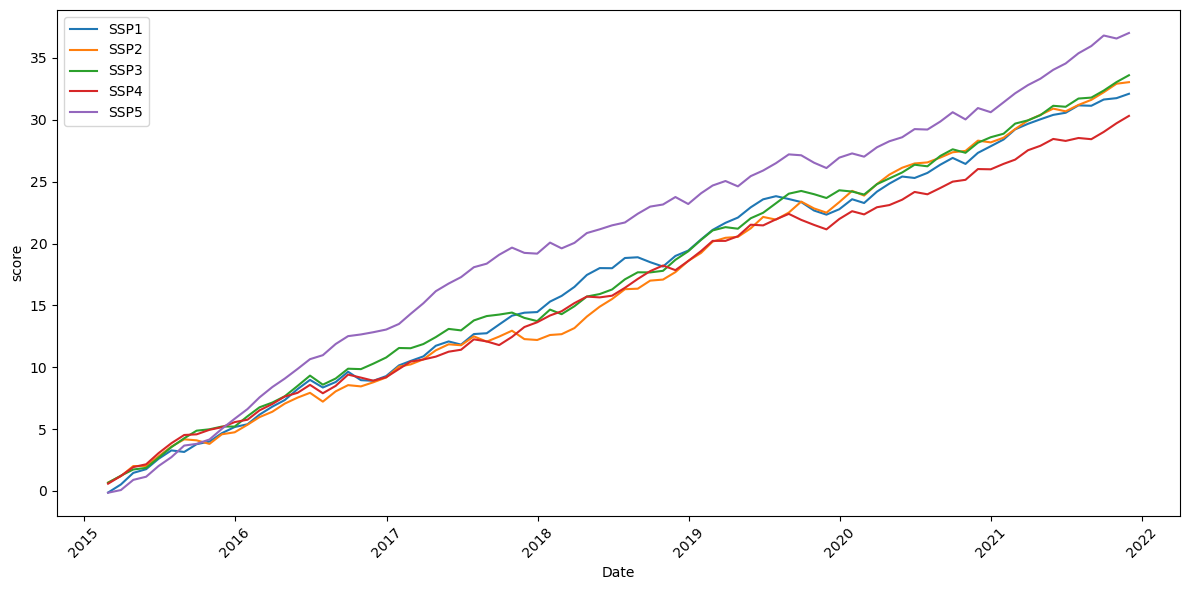

Chile monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


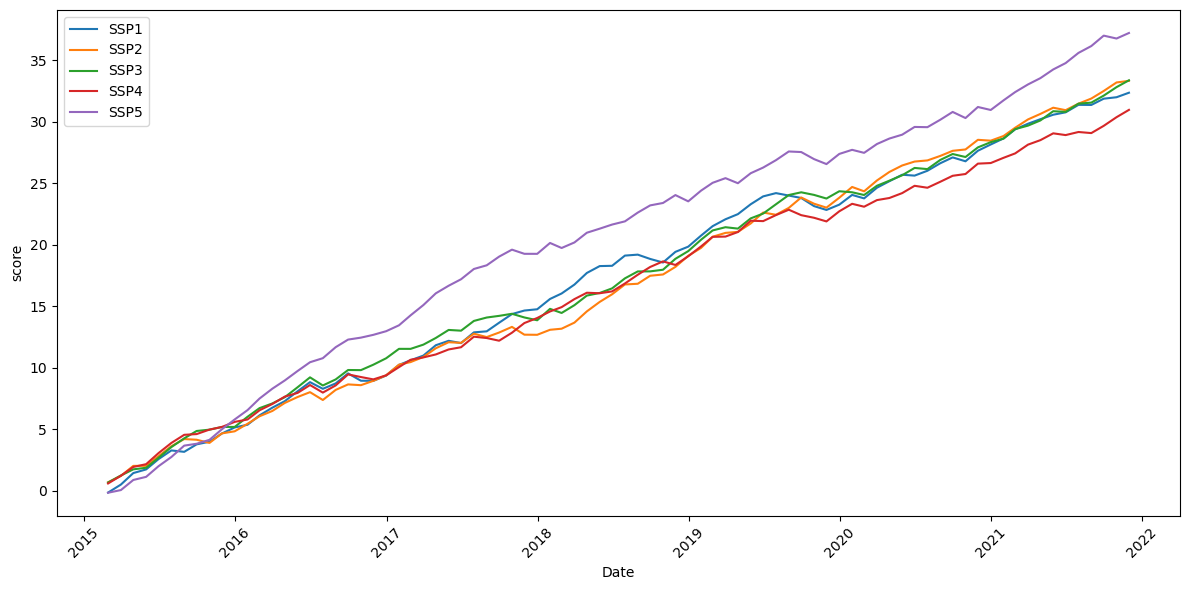

Colombia monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


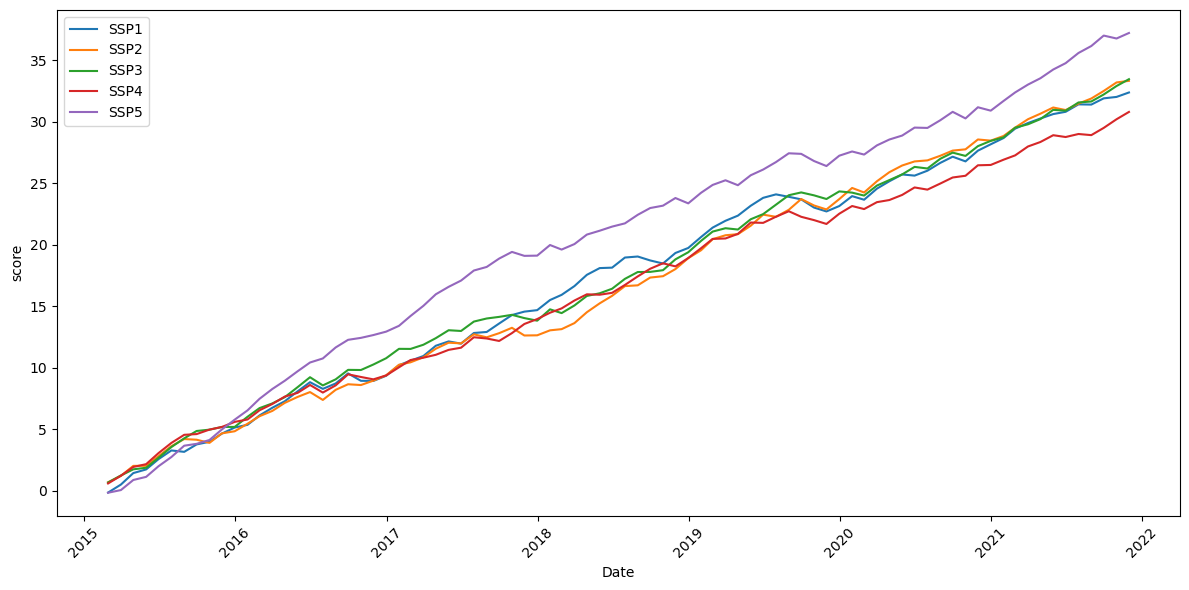

Costa Rica monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


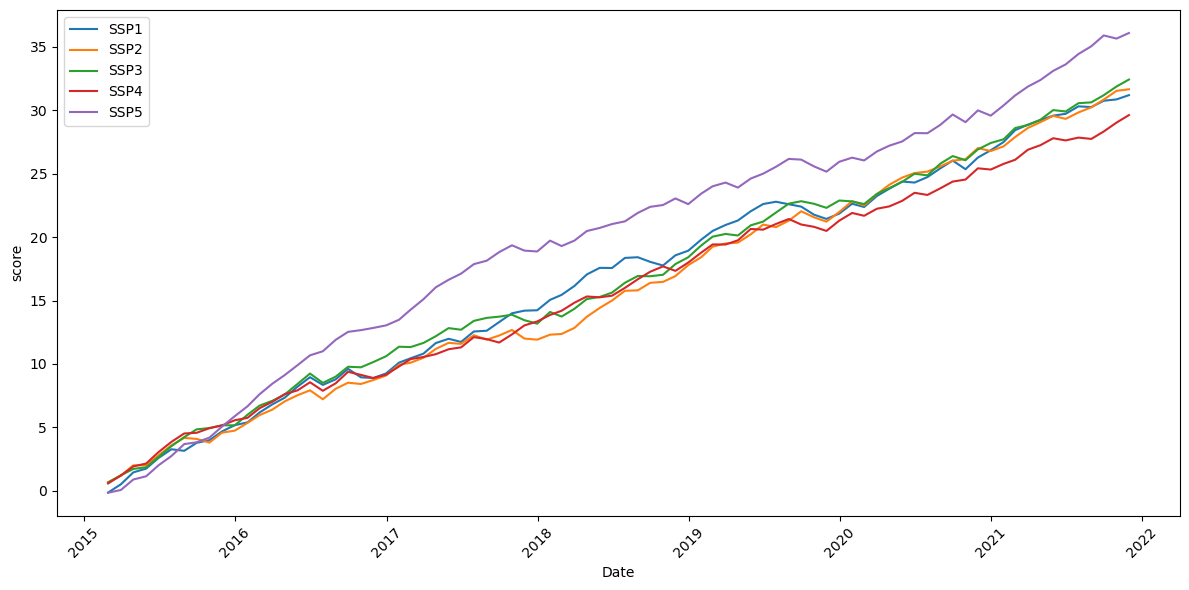

Cyprus monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


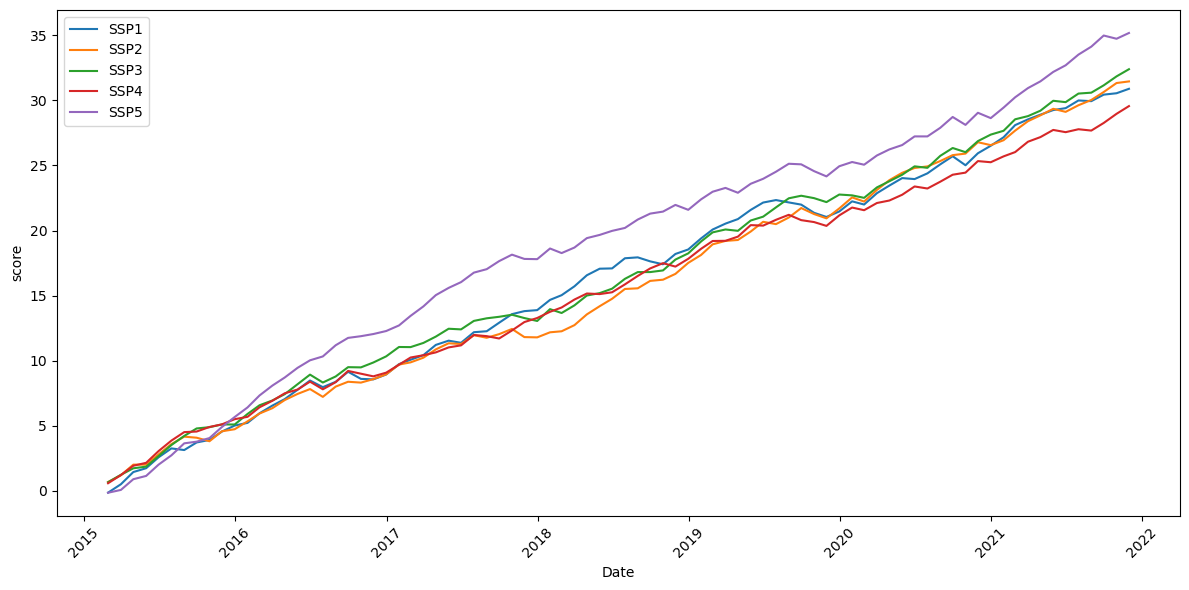

Germany monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


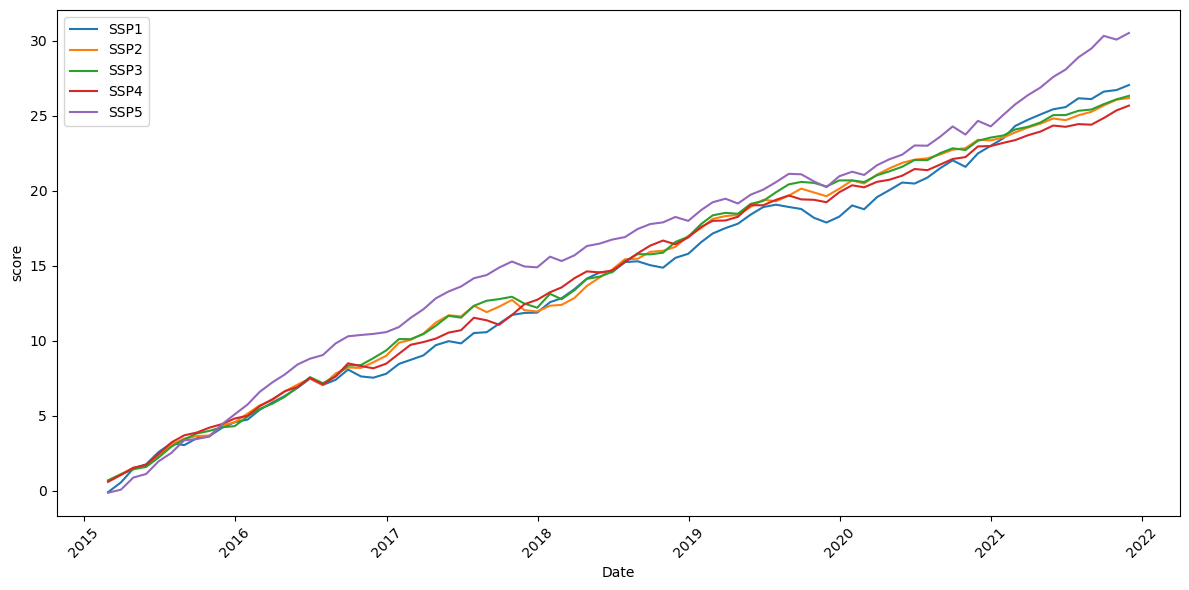

Denmark monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


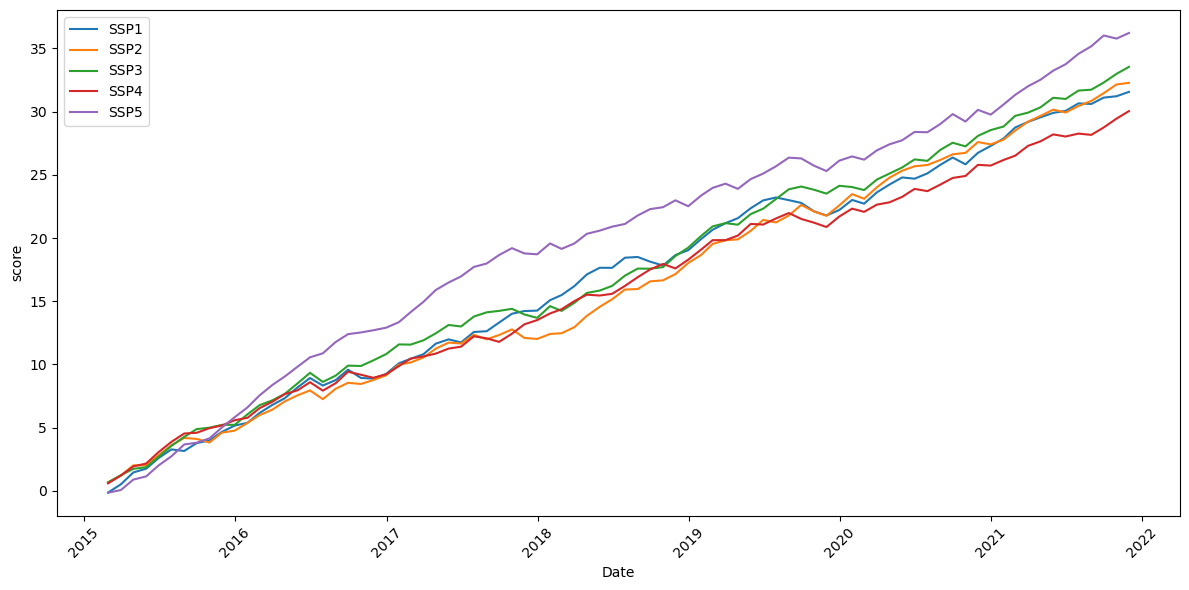

Spain monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


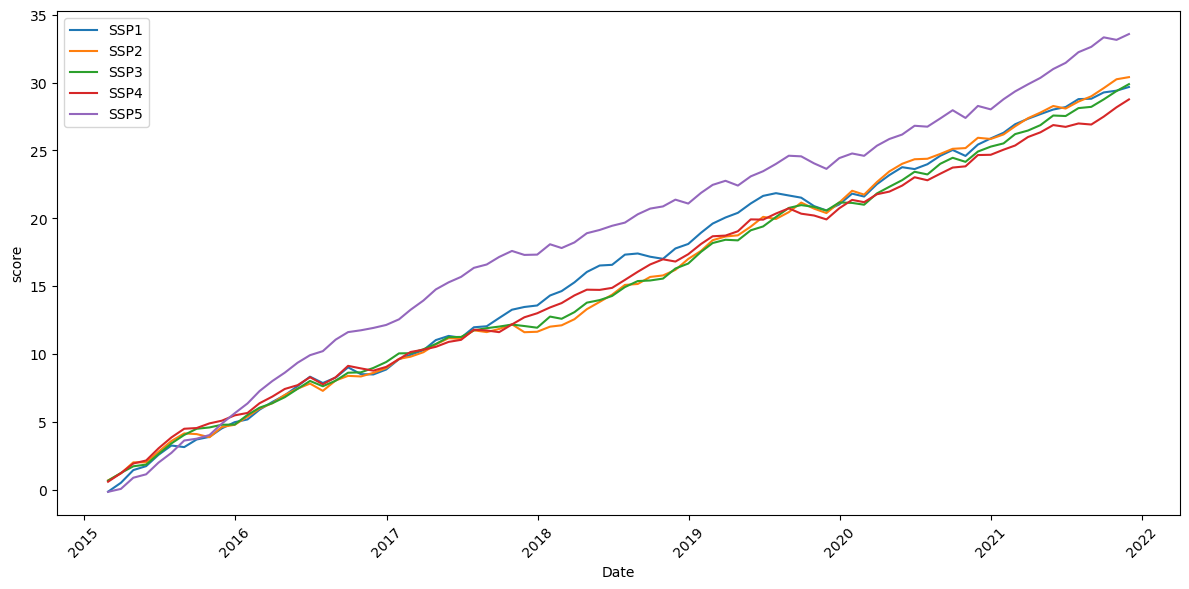

Finland monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


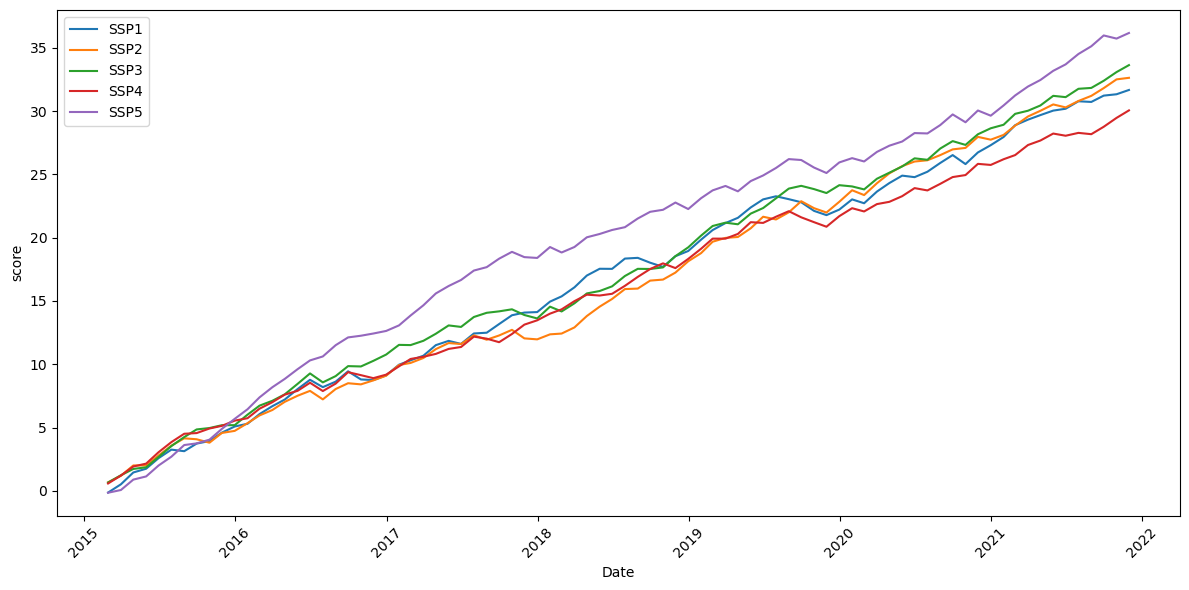

France monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


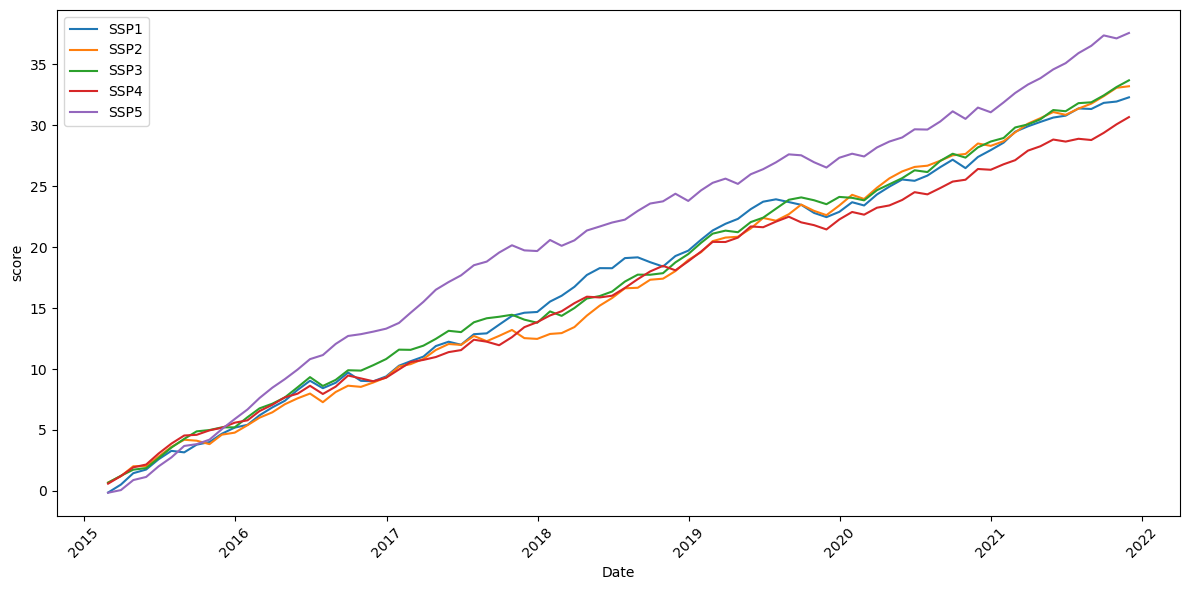

United Kingdom monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


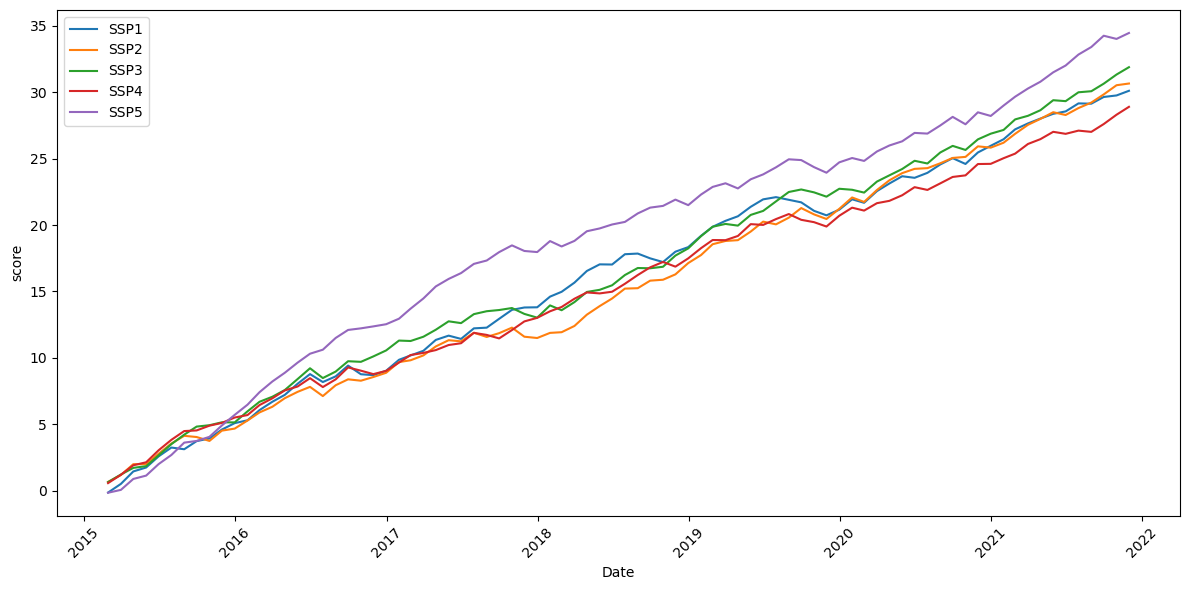

Greece monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


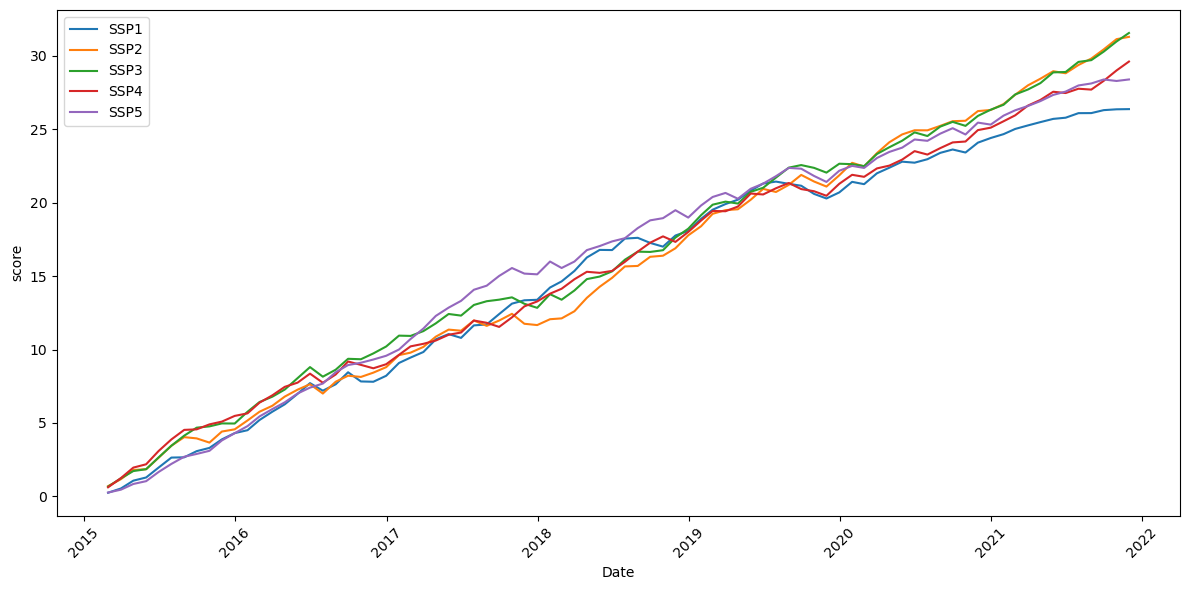

Hungary monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


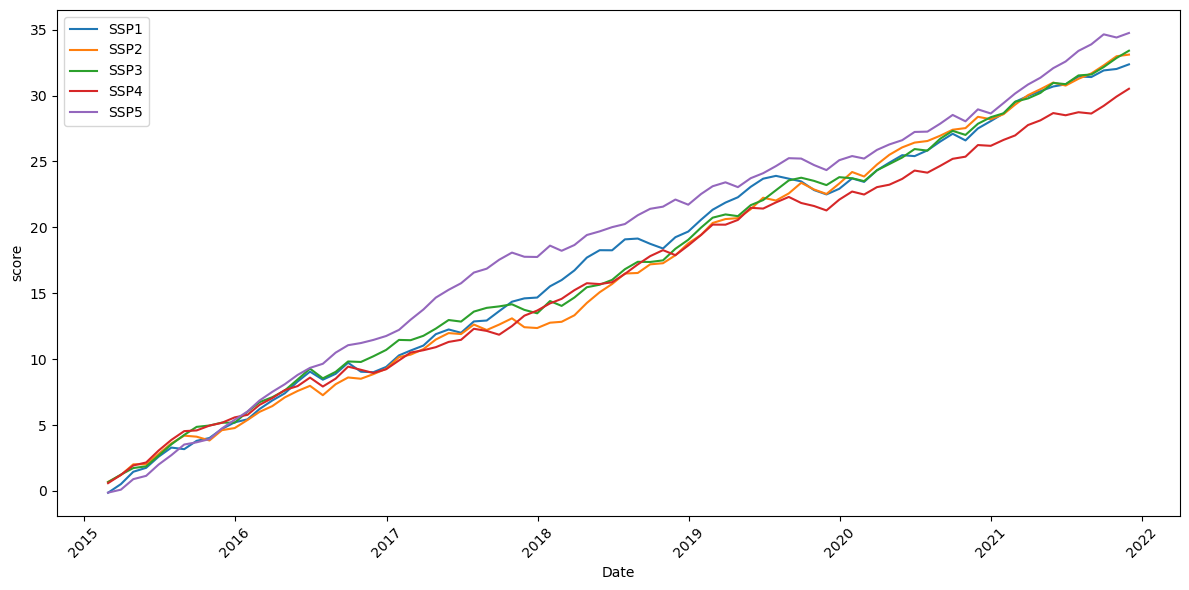

Indonesia monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


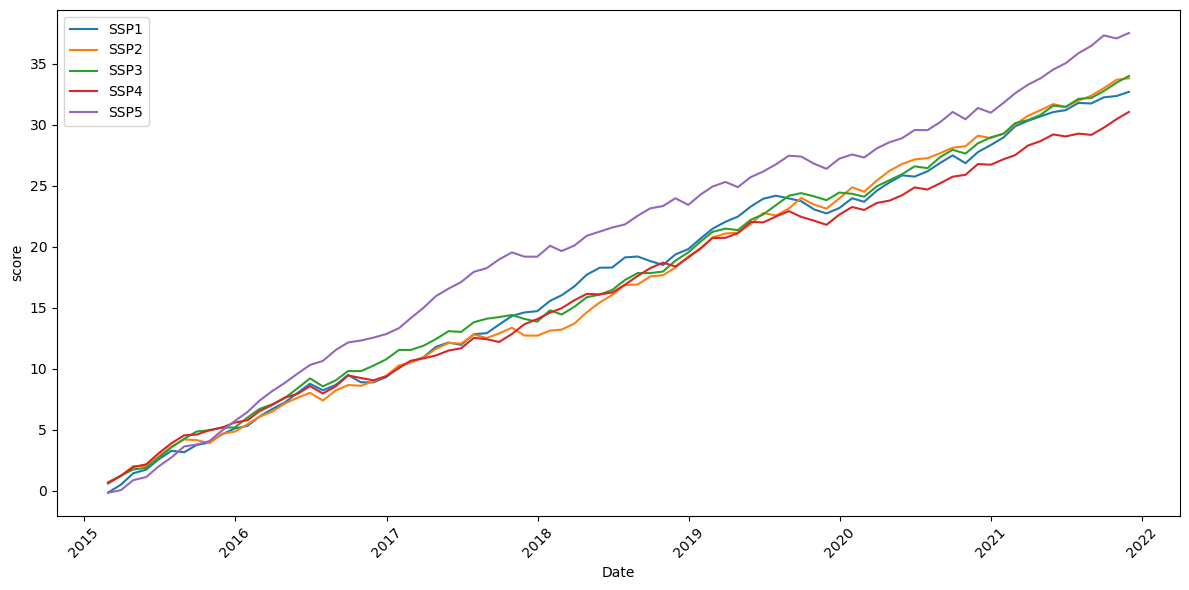

India monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


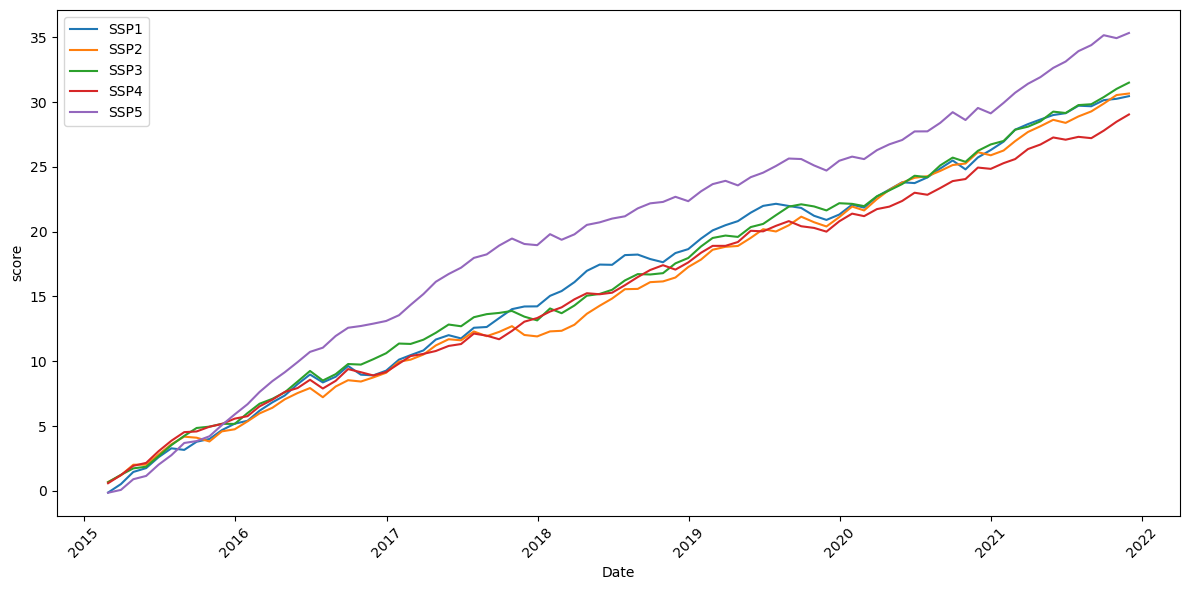

Ireland monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


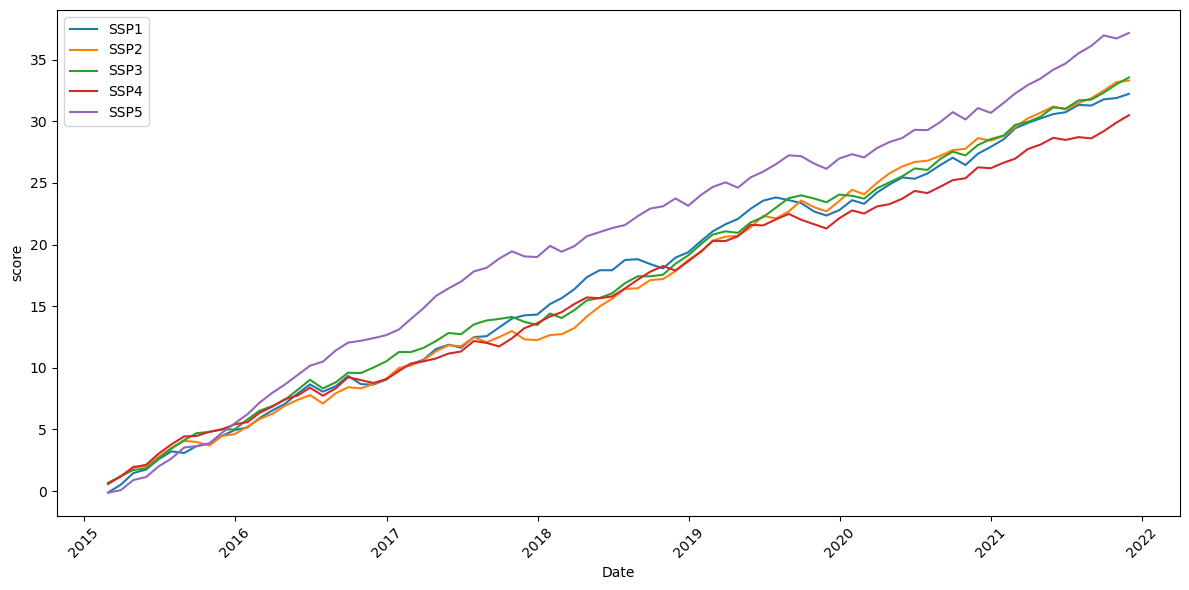

Iceland monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


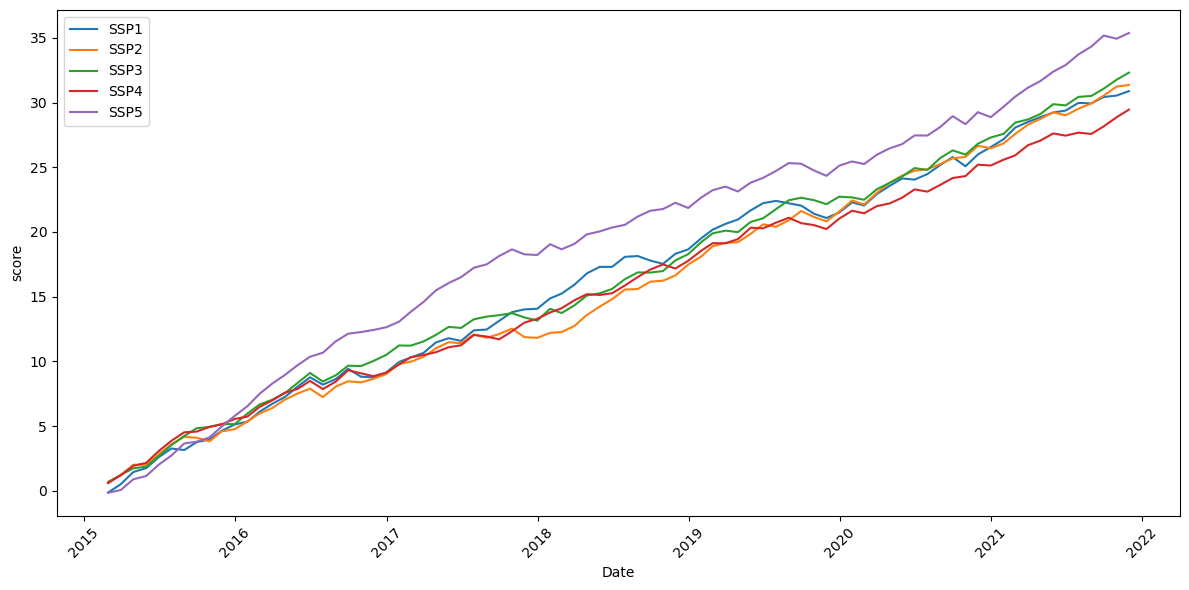

Israel monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


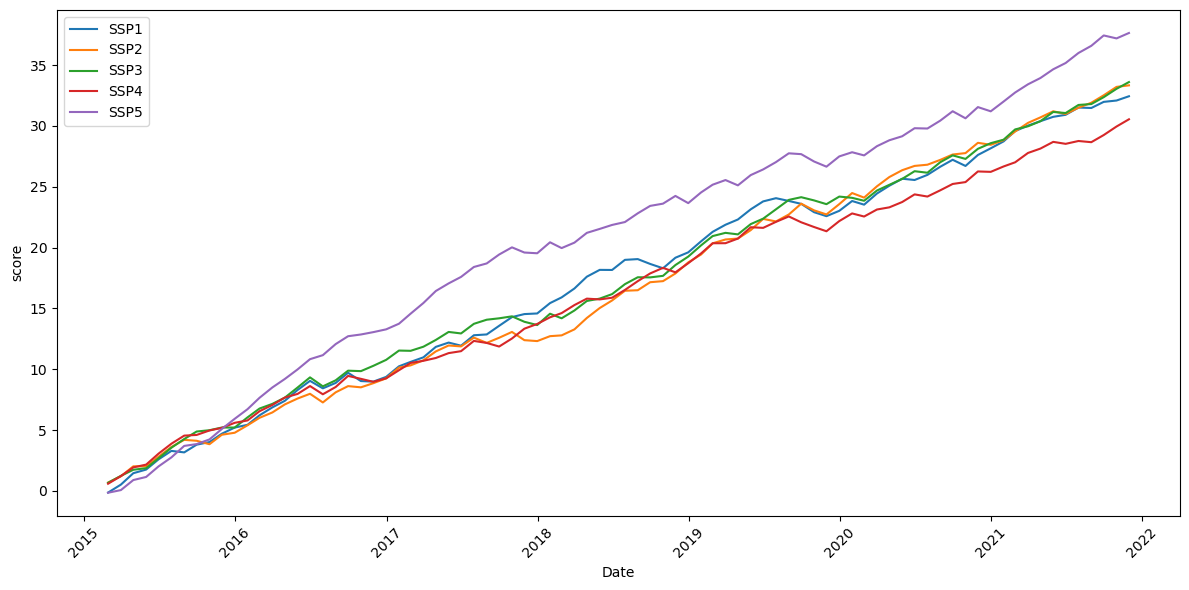

Italy monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


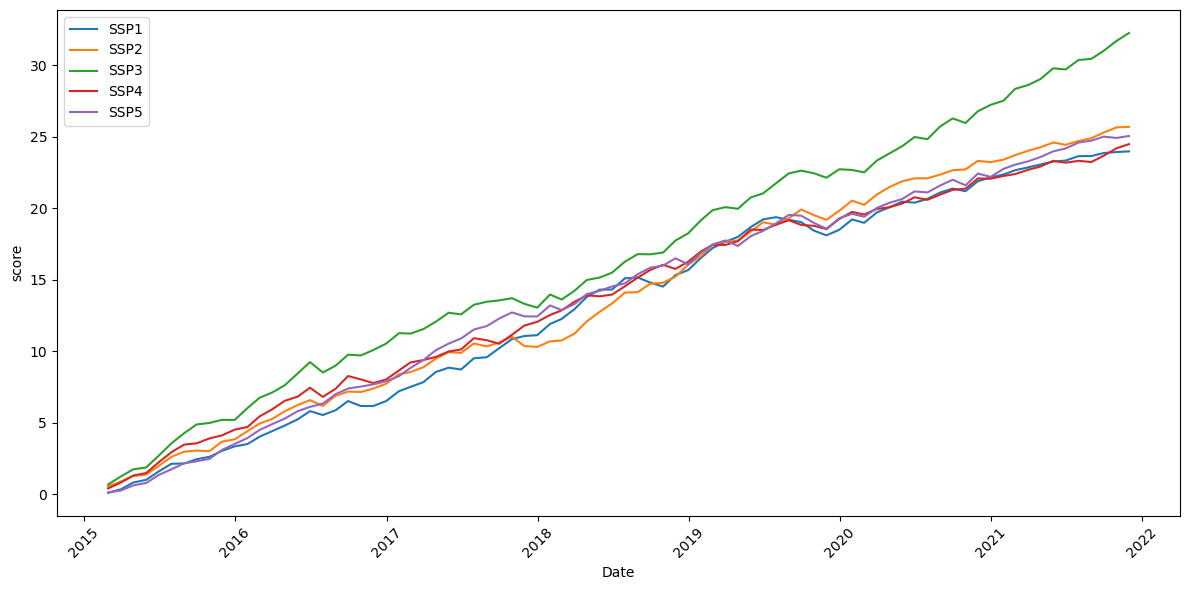

Japan monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


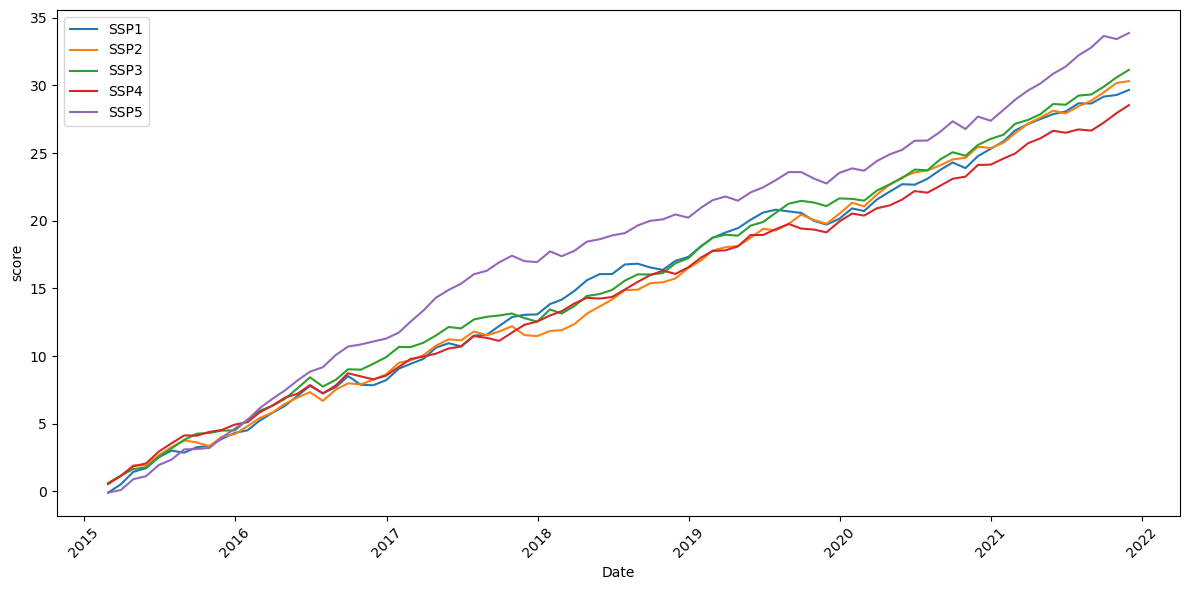

Luxembourg monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


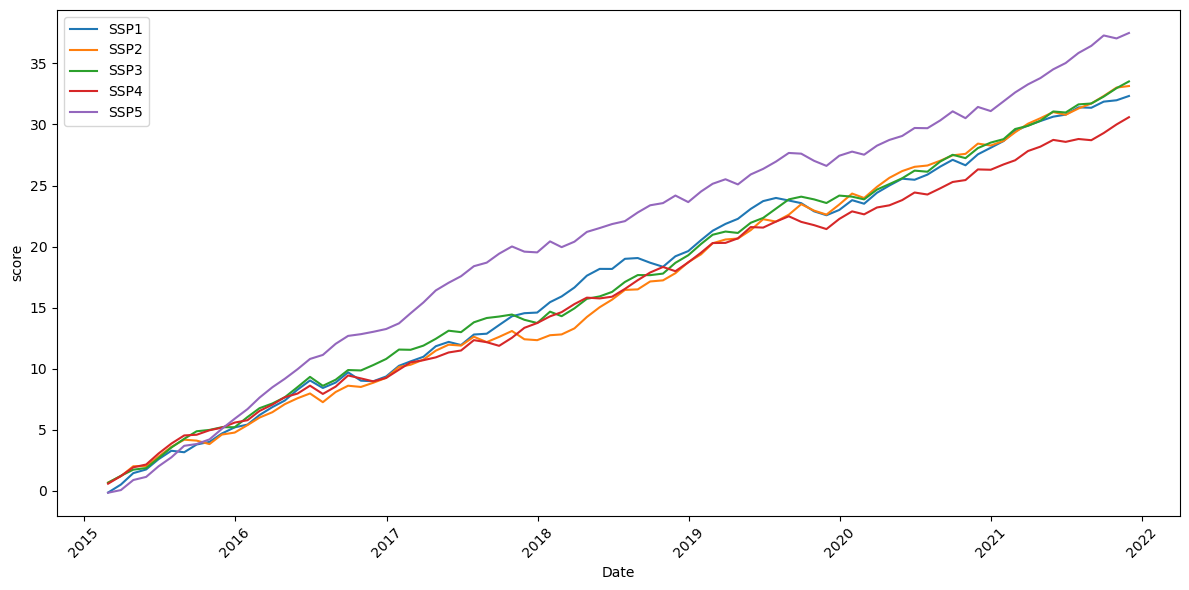

Mexico monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


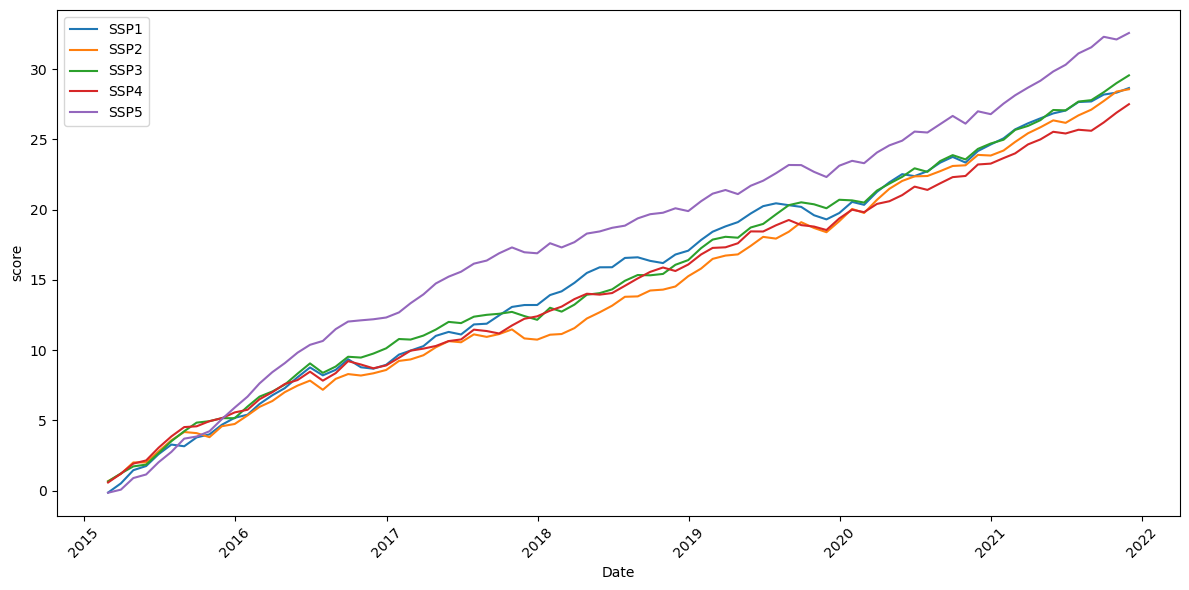

Malta monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


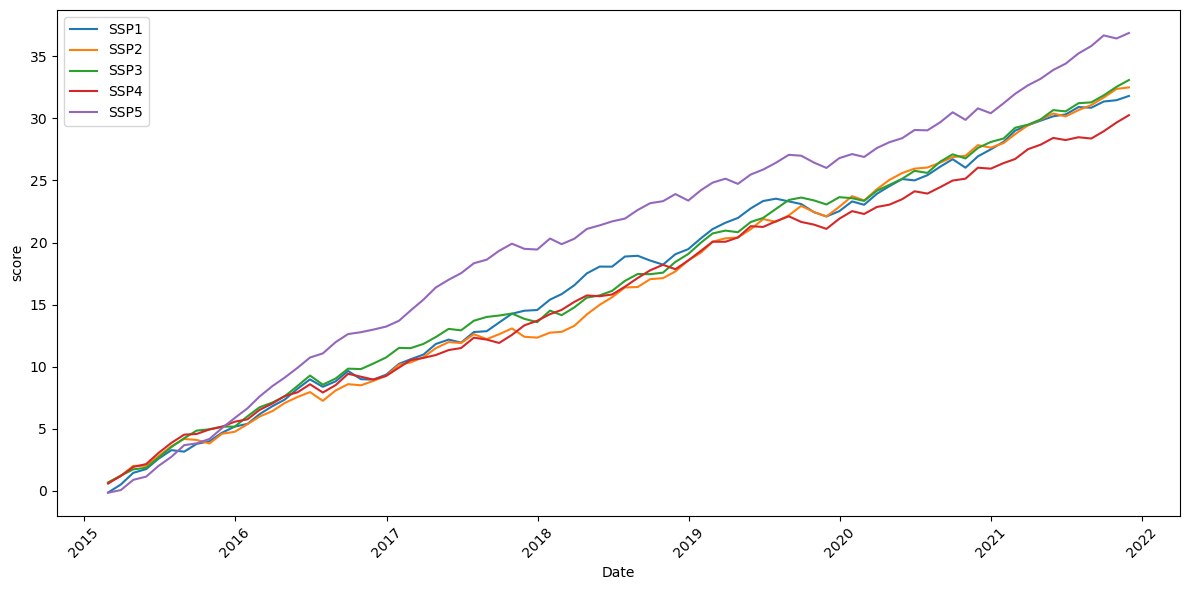

Netherlands monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


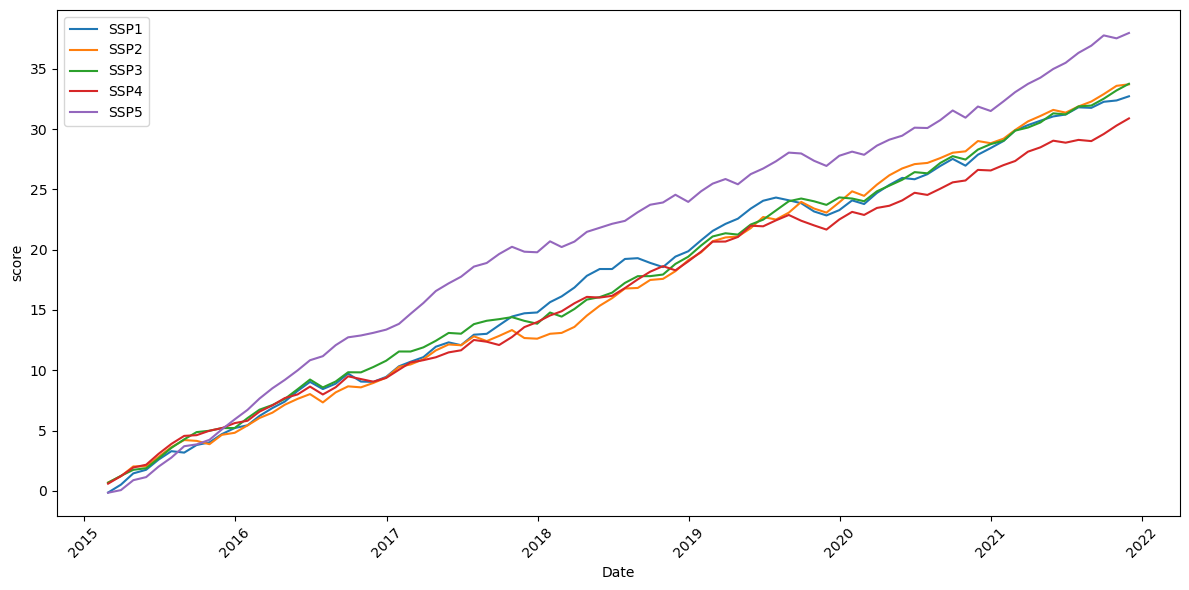

Norway monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


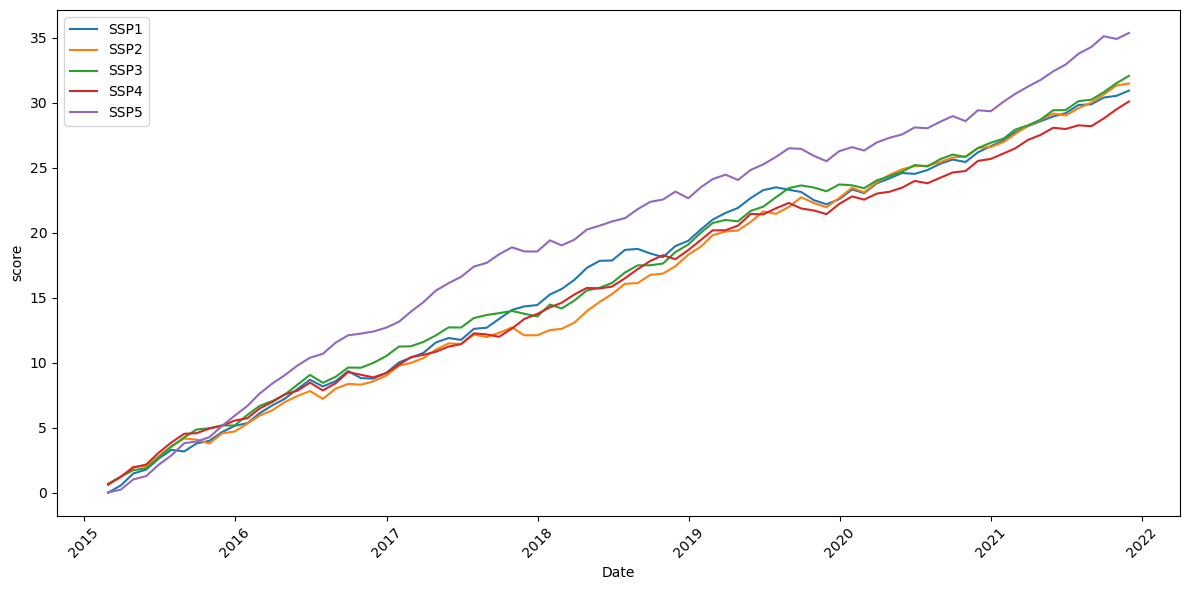

New Zealand monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


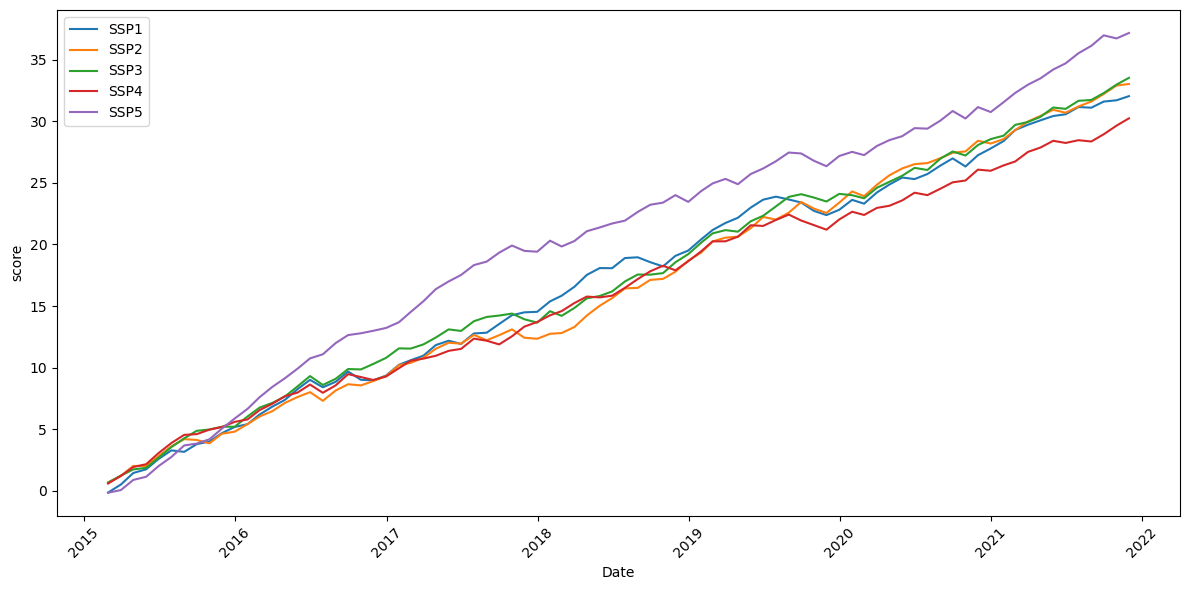

Poland monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


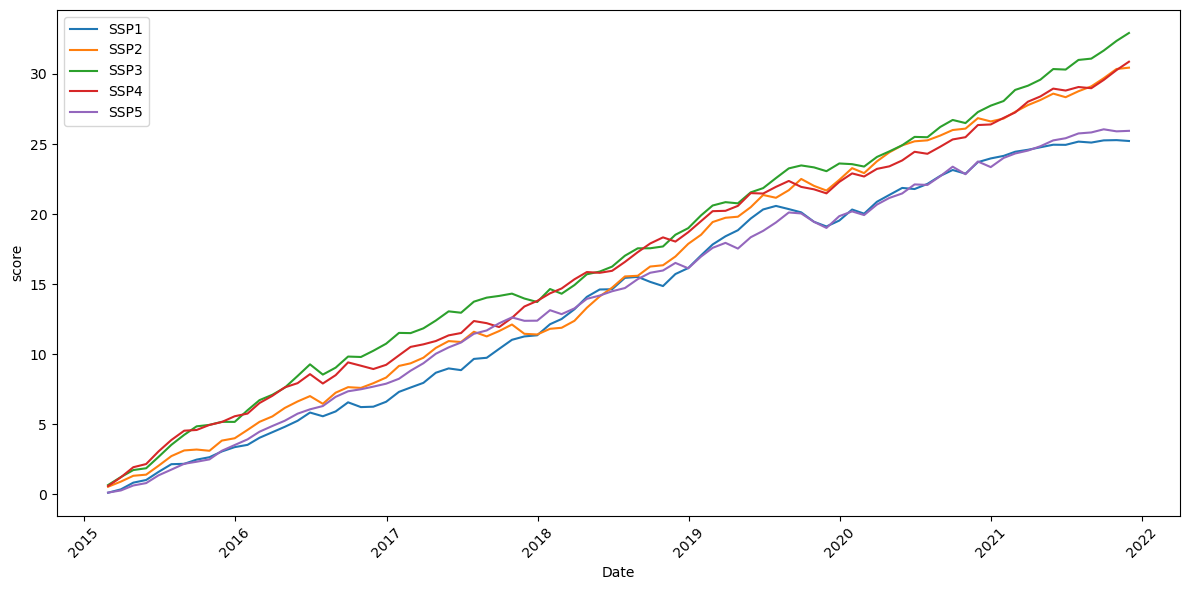

Portugal monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


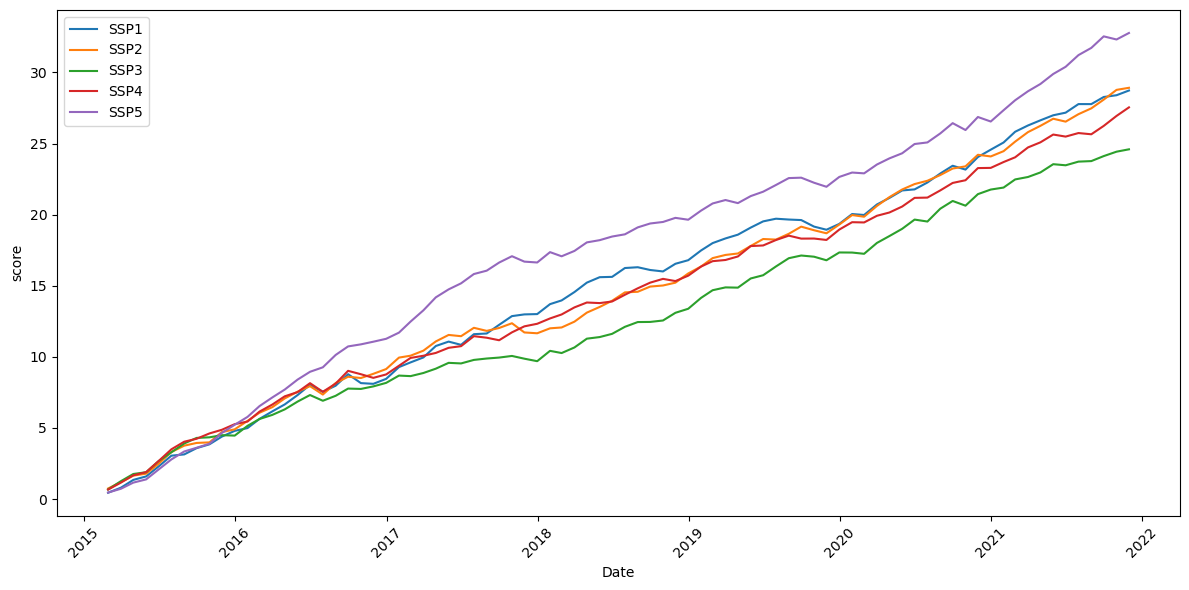

Romania monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


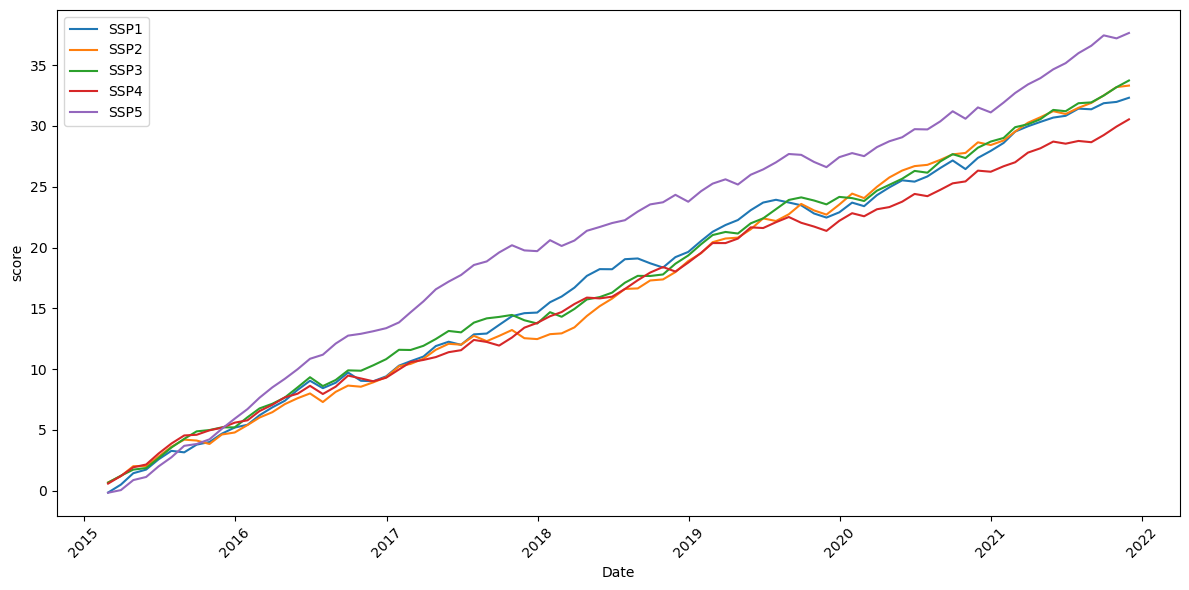

Saudi Arabia monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


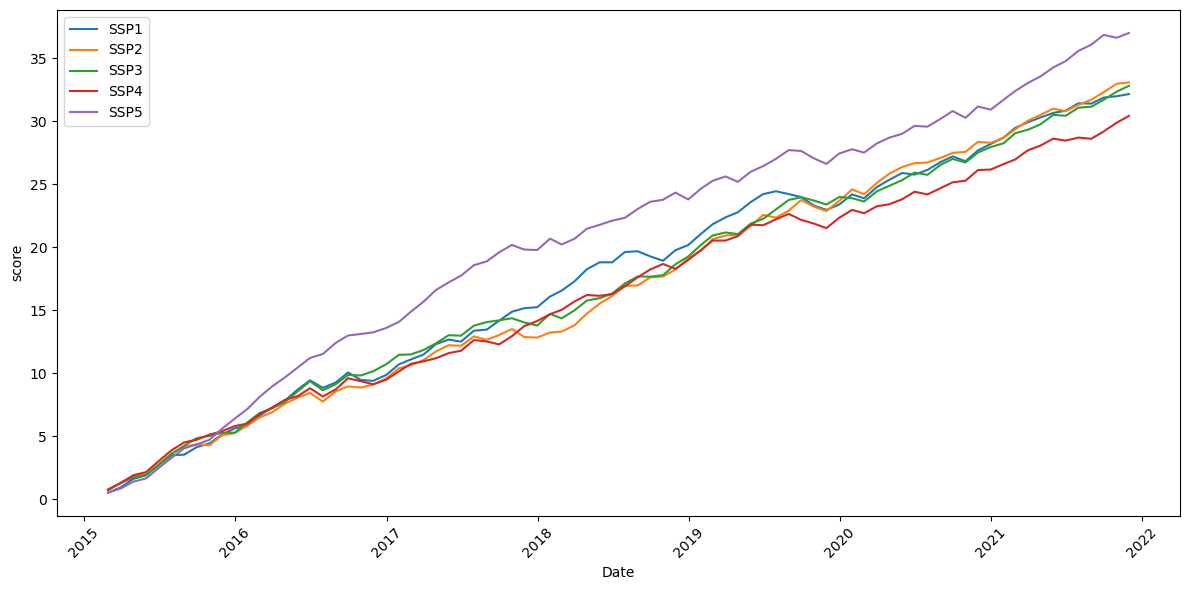

Singapore monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


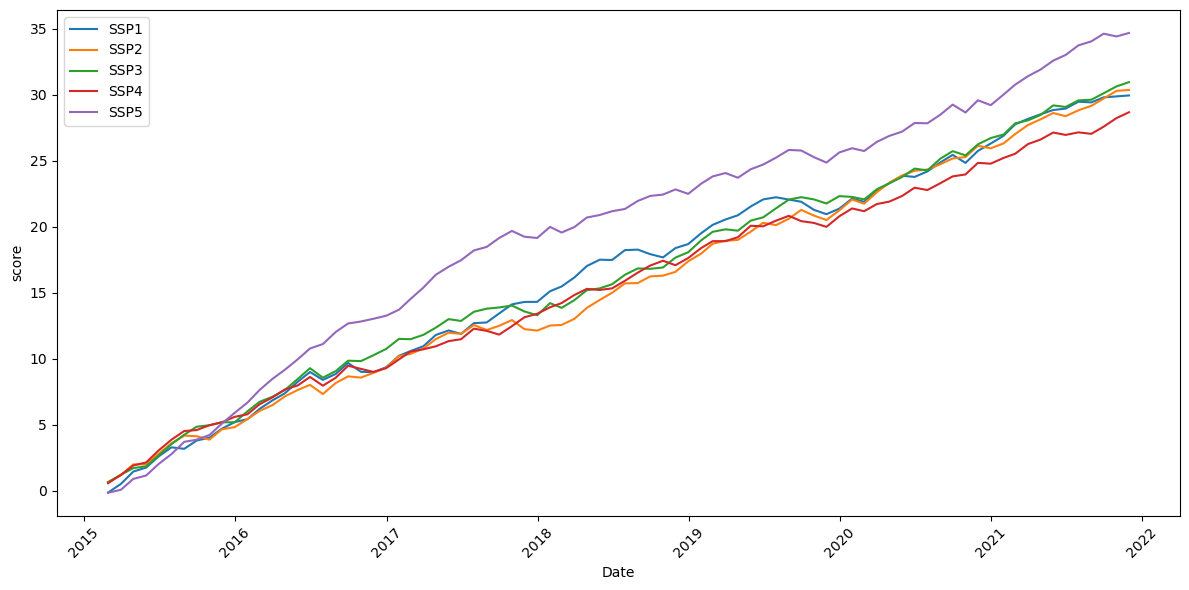

Sweden monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


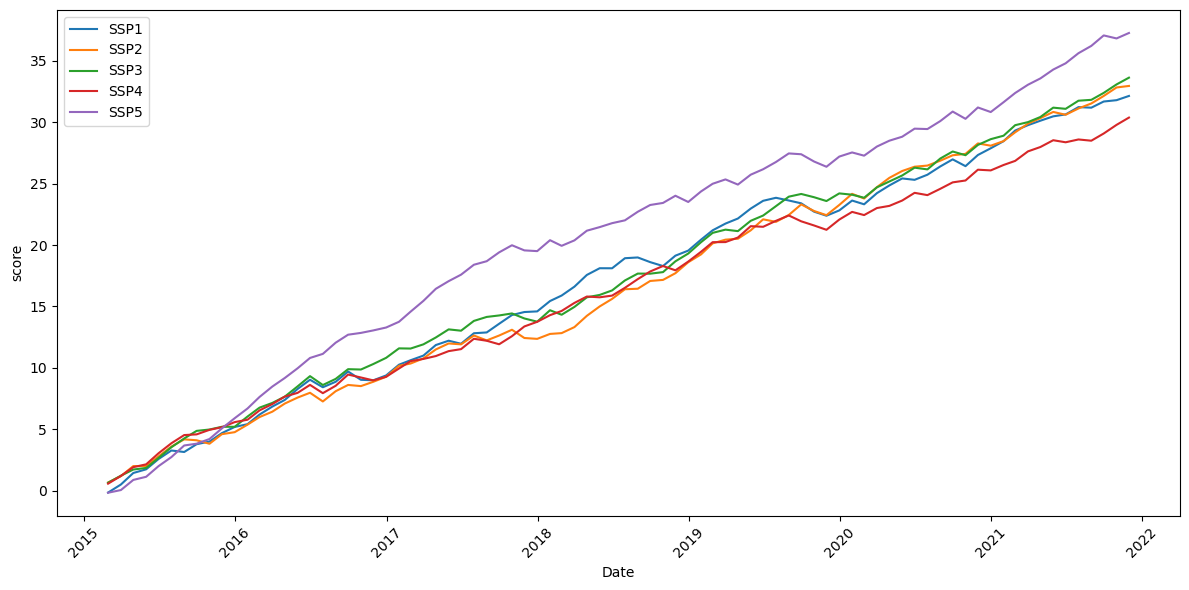

Turkey monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


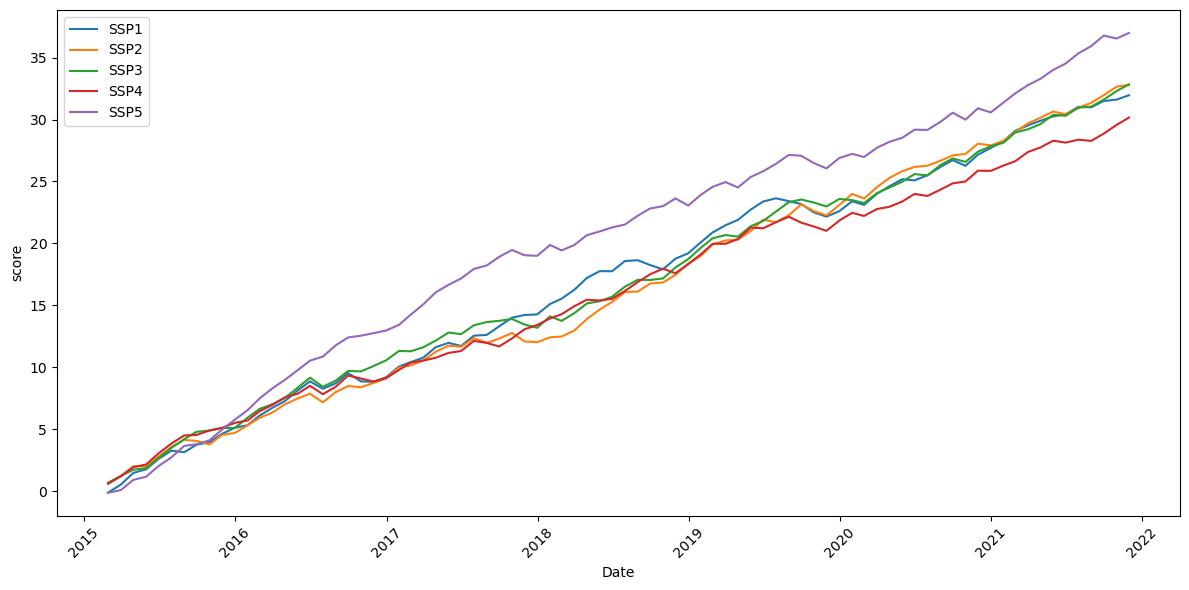

United States monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


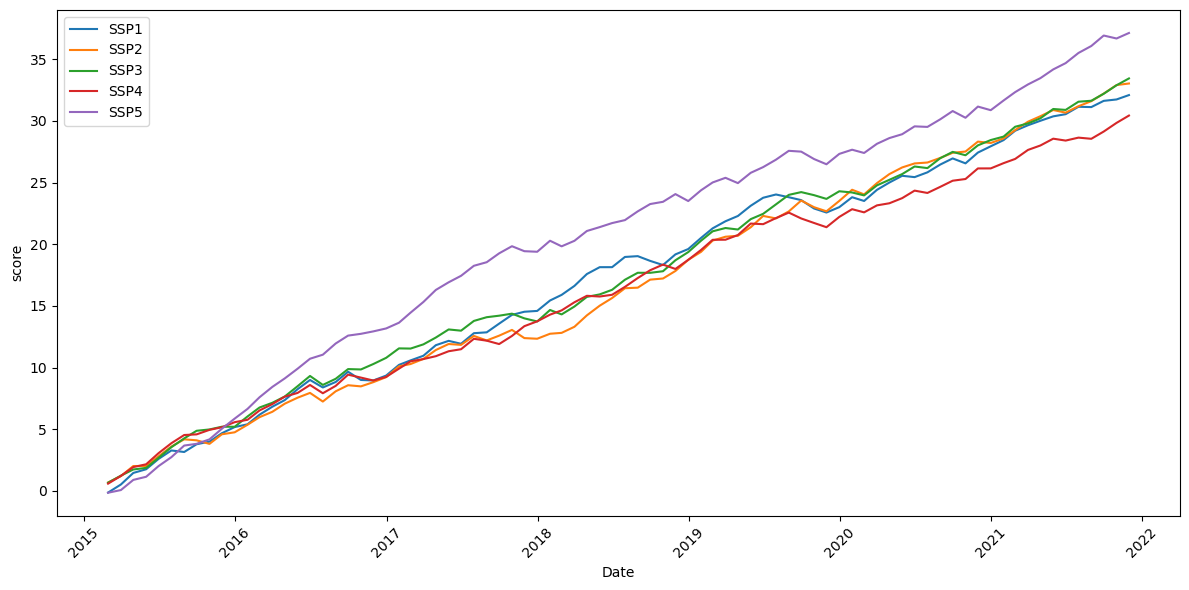

South Africa monthly cumulative TraCE score with variables: ch4, gdp, population, pressure, temperature, wind_speed


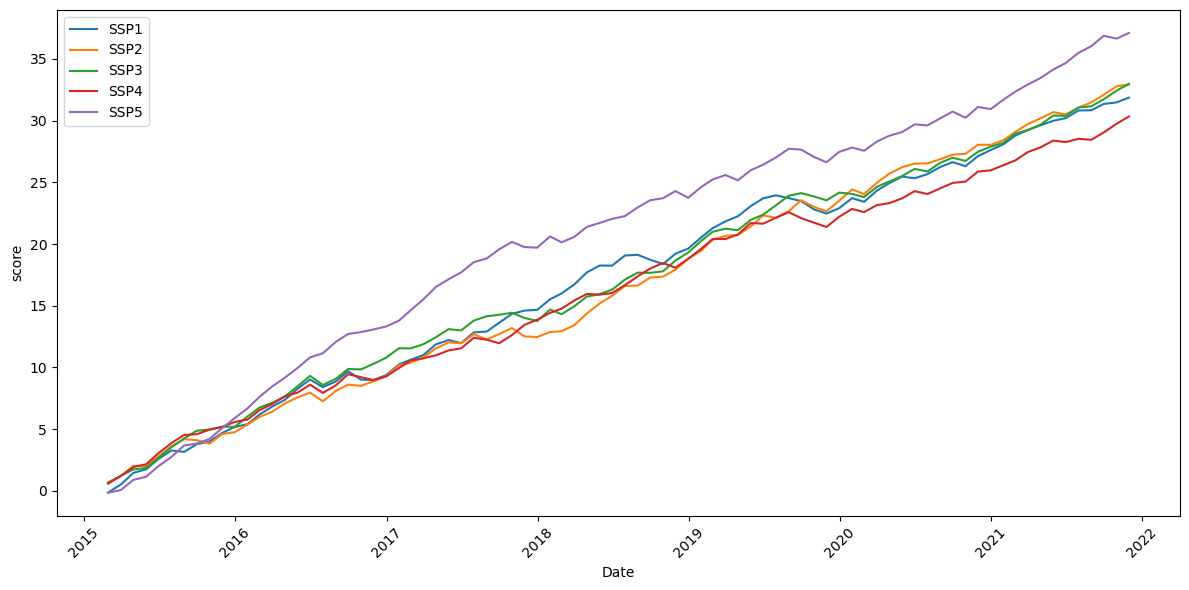

In [20]:
for country in country_codes_df["code"]:
    plot_country_ssp_trace_scores(country, SSPs, start_date, end_date, frequency, data_folder, country_codes_df, 
                                  angle_weight=0.9, cumulative_sum=True, figsize=(12,6), title=False)

## Feature timeseries

In [6]:
variables_list = [f.replace("historical_", "").replace(".csv", "") for f in os.listdir(data_folder) if f.endswith(".csv") and "historical" in f]

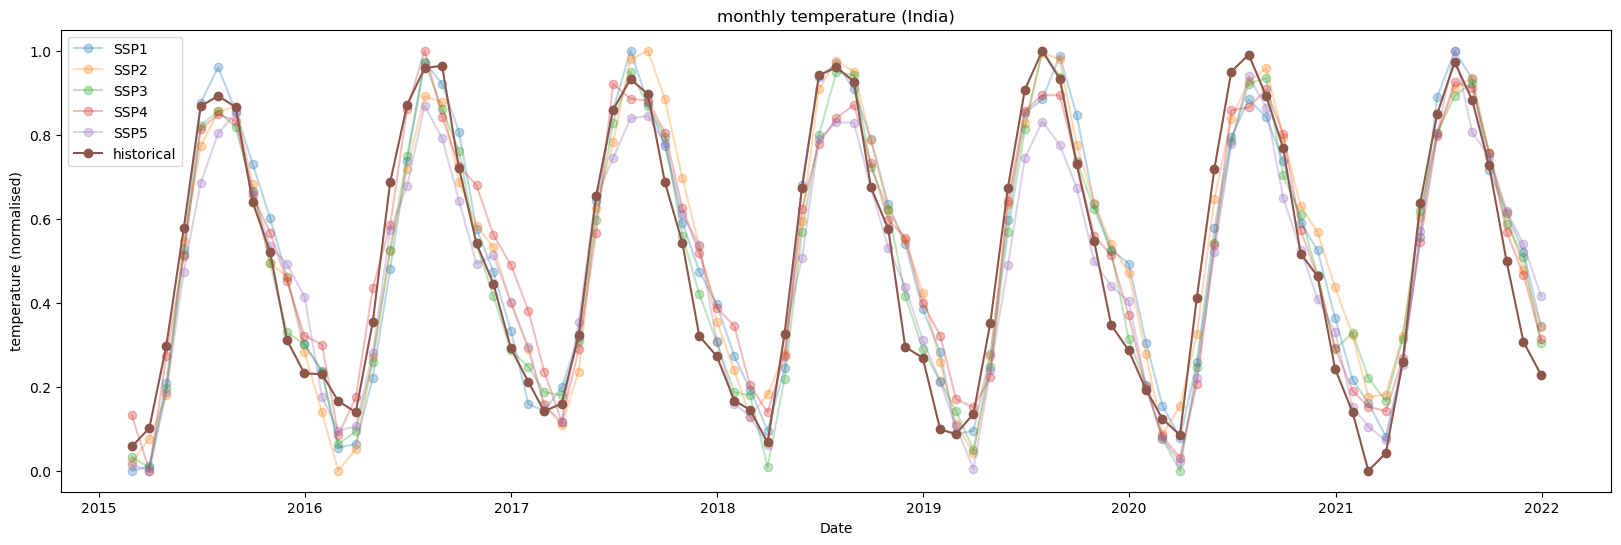

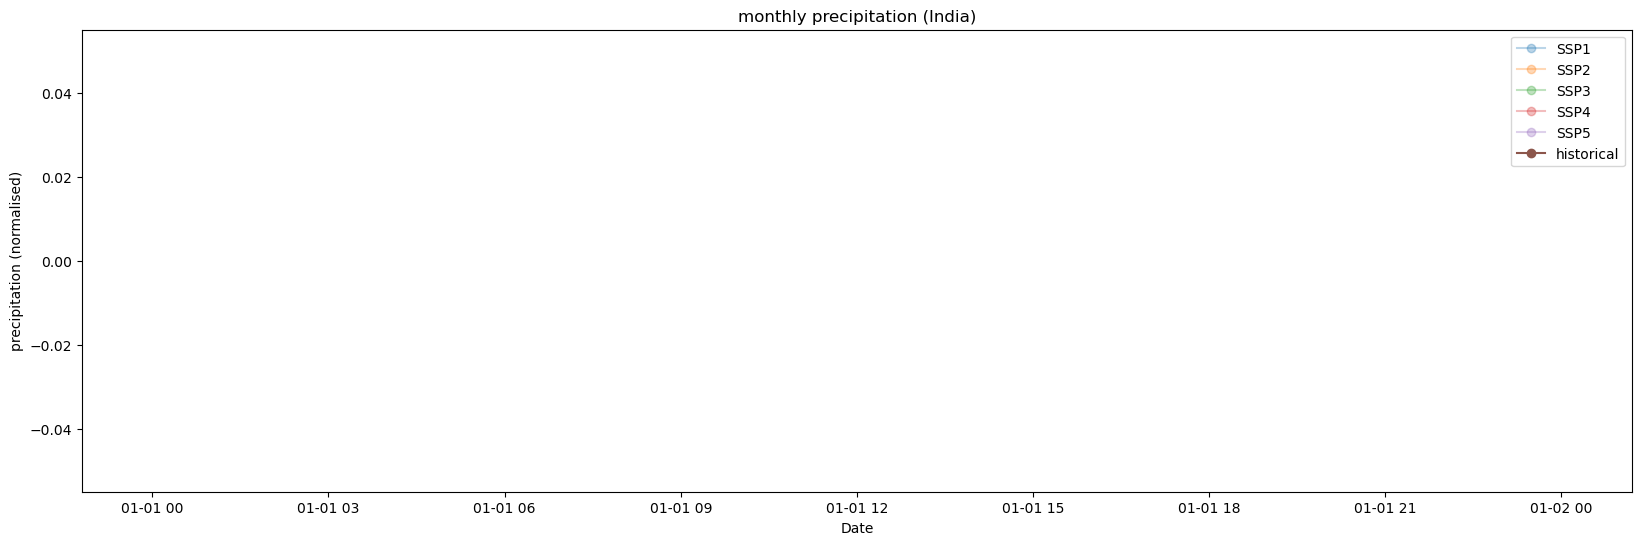

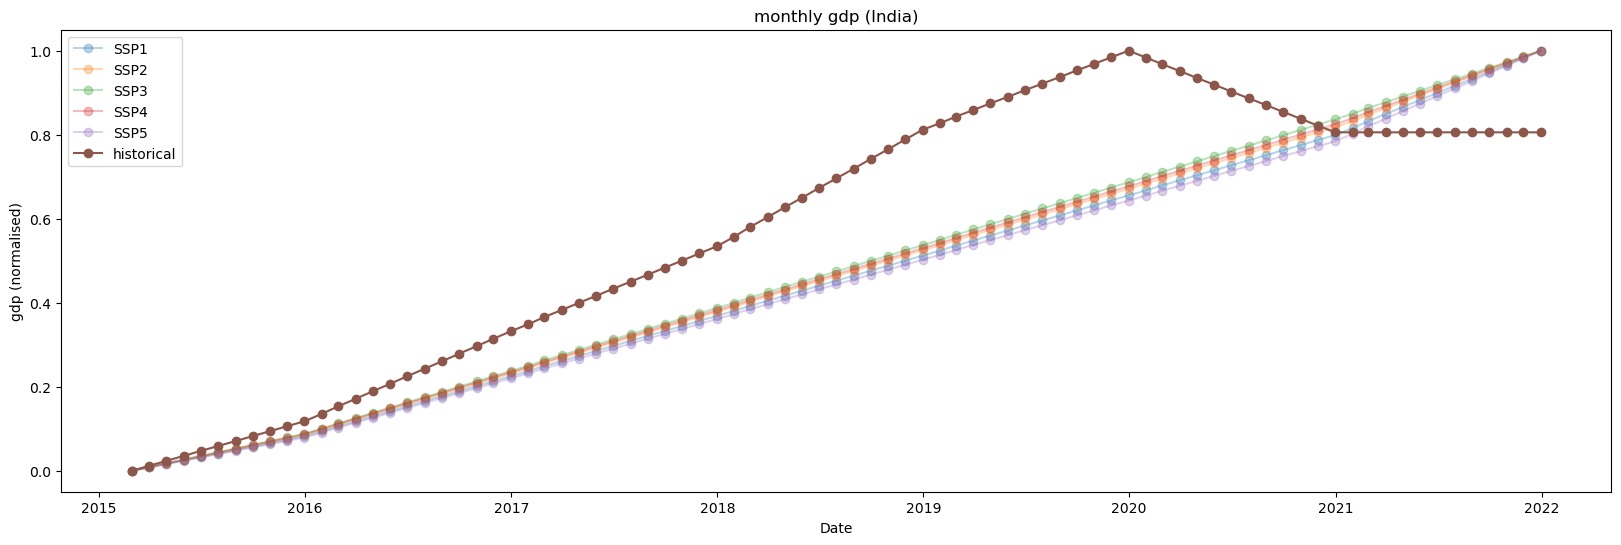

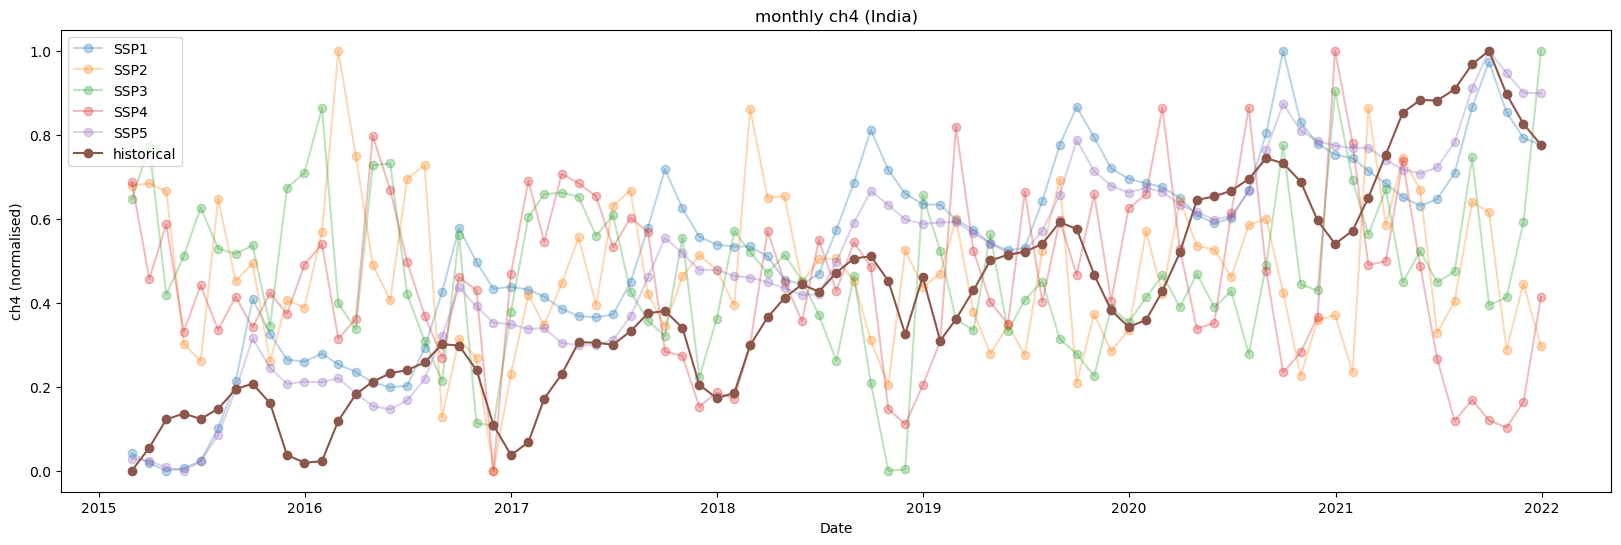

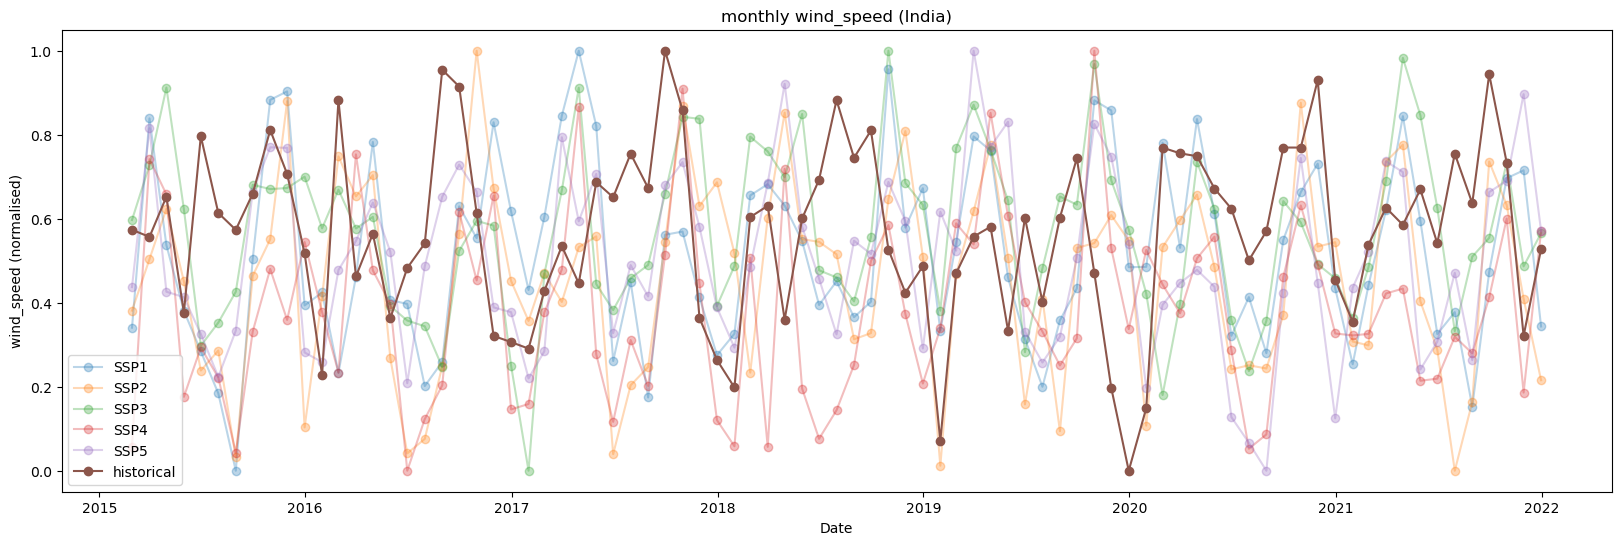

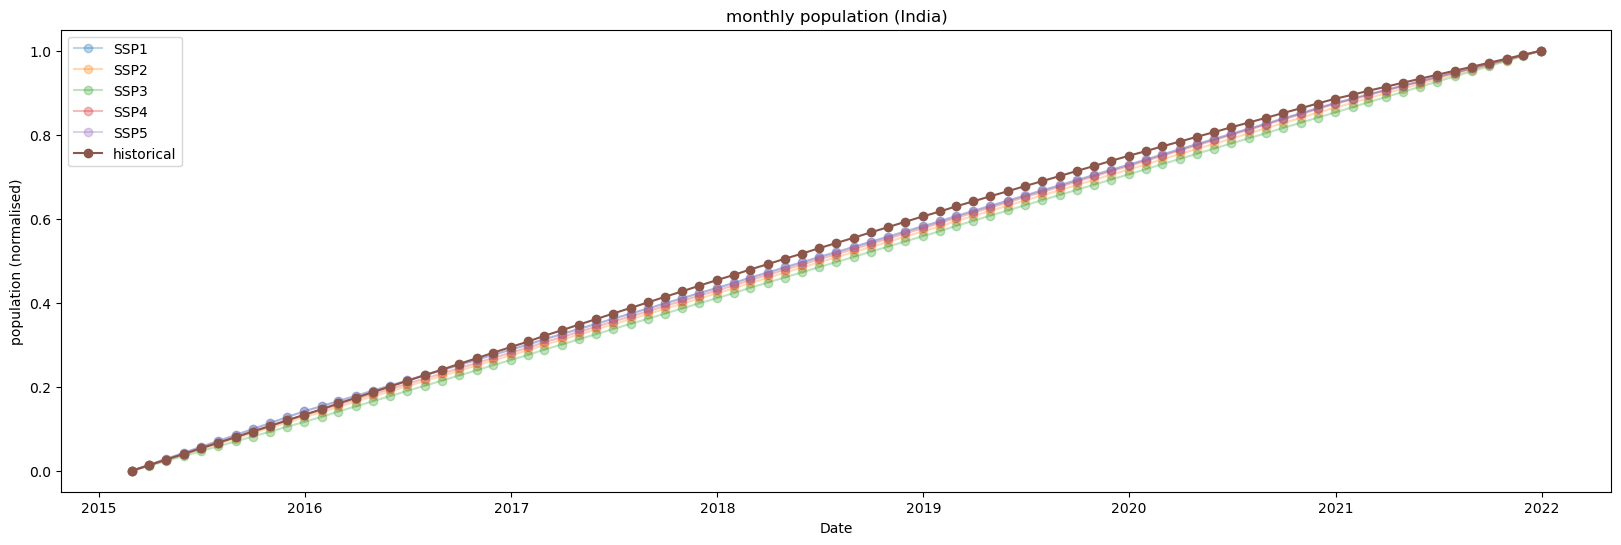

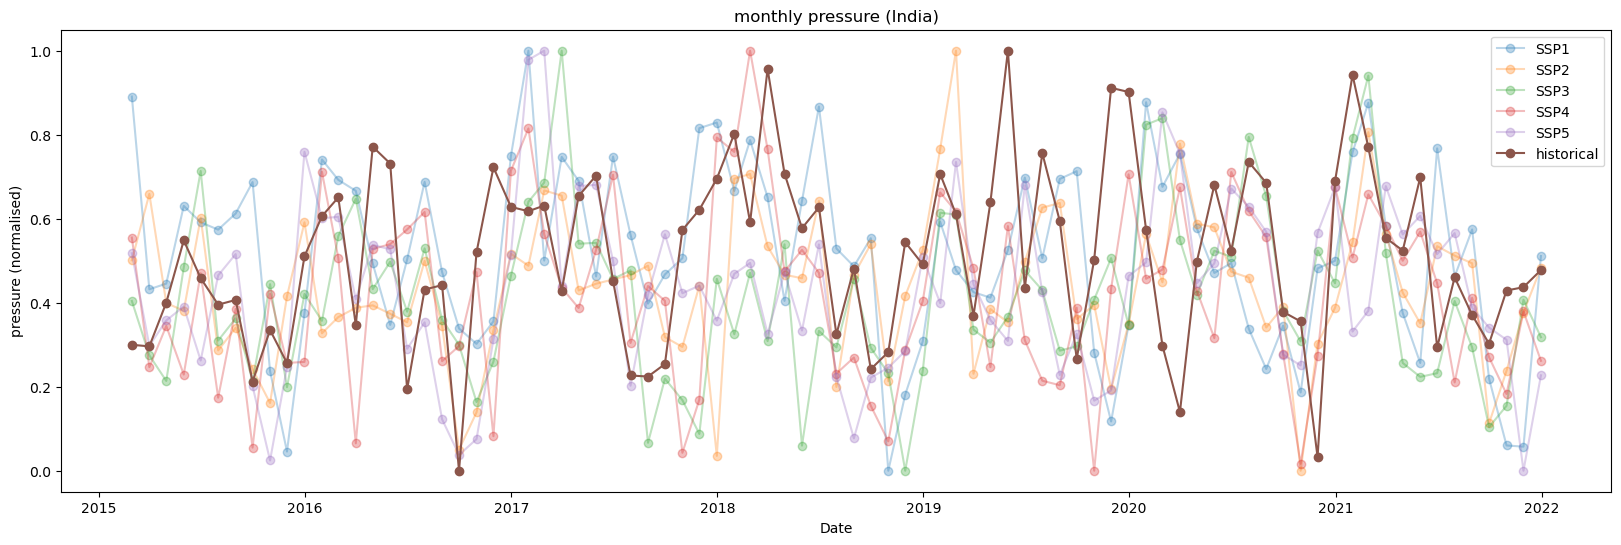

In [18]:
country_code = "IND"

for feature in variables_list:
    plot_feature_timeseries(feature, country_code, SSPs, start_date, end_date, frequency, data_folder, country_codes_df, title=True)

## Feature vs Feature

In [ ]:
# Get list of variable names
historical_csv_filenames = [f for f in os.listdir(data_folder) if f.endswith(".csv") and "ssp" not in f]
historical_csv_filenames.sort()
variables_list = [filename.replace("historical_", "").replace(".csv", "") for filename in historical_csv_filenames]

# Get list of unique pairs
unique_pairs = list(itertools.combinations(variables_list, 2))

In [ ]:
country_code = "NOR"

for pair in unique_pairs:
    plot_two_features(pair[0], pair[1], country_code, SSPs, start_date, end_date, frequency, data_folder, country_codes_df, title=False)